In [1]:
import hail as hl
hl.init()
from hail.plot import show
from pprint import pprint
hl.plot.output_notebook()

2023-12-07 13:02:31.529 WARN  Utils:69 - Your hostname, hidenaoki-MacBook.local resolves to a loopback address: 127.0.0.1; using 172.19.189.38 instead (on interface en0)
2023-12-07 13:02:31.533 WARN  Utils:69 - Set SPARK_LOCAL_IP if you need to bind to another address
2023-12-07 13:02:31.935 WARN  NativeCodeLoader:60 - Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
Running on Apache Spark version 3.1.3
SparkUI available at http://172.19.189.38:4040
Welcome to
     __  __     <>__
    / /_/ /__  __/ /
   / __  / _ `/ / /
  /_/ /_/\_,_/_/_/   version 0.2.107-2387bb00ceee
LOGGING: writing to /Users/naoki/dev/my-zemi/prs-on-hail/hail-20231207-1302-0.2.107-2387bb00ceee.log


Loading BokehJS ...

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# 生成した子供のゲノムデータからPRSを計算する関数を定義します

In [3]:
def compute_prs(dir_path, file_name, prs_model_name):

    tl = hl.import_table(f"{dir_path}/{file_name}", impute=True, force=True)
    tl = tl.annotate(alleles=tl.alleles.replace('"', '')[1:-1].split(','))
    
    prs_model = hl.import_table(f"prs-models/{prs_model_name}", impute=True, force=True)
    prs_model = prs_model.annotate(
        variantID = hl.str(prs_model.chr_name) + ":" + hl.str(prs_model.chr_position) 
    )
    prs_model = prs_model.key_by('variantID')
    
    
    tl_match_model = tl.annotate(**prs_model[tl.variantID])
    tl_match_model = tl_match_model.filter(hl.is_defined(tl_match_model.effect_weight))

    flip = hl.case().when(
        (tl_match_model.effect_allele == tl_match_model.alleles[0]) 
        & (tl_match_model.reference_allele == tl_match_model.alleles[1]), True ).when( 
        (tl_match_model.effect_allele == tl_match_model.alleles[1])
        & (tl_match_model.reference_allele == tl_match_model.alleles[0]), False ).or_missing()
    tl_match_model = tl_match_model.annotate( flip=flip )
    prs = hl.agg.sum(
        hl.float64( tl_match_model.effect_weight ) * 
                    hl.if_else(
                        tl_match_model.flip, 
                        2 - tl_match_model.DS,
                        tl_match_model.DS
                    )
    )

    return tl_match_model.aggregate(prs)

In [4]:
#  生成した子供のゲノムデータからPRSを計算します

2023-12-06 02:03:41.064 Hail: INFO: wrote table with 1713633 rows in 1 partition to /tmp/persist_tablelFTyhJocdn
2023-12-06 02:03:42.141 Hail: INFO: Reading table to impute column types
2023-12-06 02:03:48.096 Hail: INFO: Finished type imputation        (1 + 2) / 3]
  Loading field 'locus' as type str (imputed)
  Loading field 'alleles' as type str (imputed)
  Loading field 'rsid' as type str (imputed)
  Loading field 'variantID' as type str (imputed)
  Loading field 's' as type str (imputed)
  Loading field 'GT' as type str (imputed)
  Loading field 'DS' as type float64 (imputed)
2023-12-06 02:03:48.581 Hail: INFO: wrote table with 314 rows in 1 partition to /tmp/persist_tablek0cafnmmjg
2023-12-06 02:03:48.989 Hail: INFO: Reading table to impute column types
2023-12-06 02:03:49.424 Hail: INFO: Finished type imputation
  Loading field 'chr_name' as type int32 (imputed)
  Loading field 'chr_position' as type int32 (imputed)
  Loading field 'effect_allele' as type str (imputed)
  Loading

TEST_NA18986_TEST_NA18986_x_TEST_NA18972_TEST_NA18972.txt complete, number of completed is 1


2023-12-06 02:04:07.391 Hail: INFO: wrote table with 1715502 rows in 1 partition to /tmp/persist_tablekNm2oH7pa4
2023-12-06 02:04:07.720 Hail: INFO: Reading table to impute column types
2023-12-06 02:04:12.732 Hail: INFO: Finished type imputation        (1 + 2) / 3]
  Loading field 'locus' as type str (imputed)
  Loading field 'alleles' as type str (imputed)
  Loading field 'rsid' as type str (imputed)
  Loading field 'variantID' as type str (imputed)
  Loading field 's' as type str (imputed)
  Loading field 'GT' as type str (imputed)
  Loading field 'DS' as type float64 (imputed)
2023-12-06 02:04:13.069 Hail: INFO: wrote table with 314 rows in 1 partition to /tmp/persist_tableXCzKTsQ6f6
2023-12-06 02:04:13.329 Hail: INFO: Reading table to impute column types
2023-12-06 02:04:13.621 Hail: INFO: Finished type imputation
  Loading field 'chr_name' as type int32 (imputed)
  Loading field 'chr_position' as type int32 (imputed)
  Loading field 'effect_allele' as type str (imputed)
  Loading

TEST_NA18986_TEST_NA18986_x_TEST_NA19081_TEST_NA19081.txt complete, number of completed is 2


2023-12-06 02:04:31.836 Hail: INFO: wrote table with 1714756 rows in 1 partition to /tmp/persist_tableDr9eOIIv2D
2023-12-06 02:04:32.094 Hail: INFO: Reading table to impute column types
2023-12-06 02:04:37.073 Hail: INFO: Finished type imputation        (2 + 1) / 3]
  Loading field 'locus' as type str (imputed)
  Loading field 'alleles' as type str (imputed)
  Loading field 'rsid' as type str (imputed)
  Loading field 'variantID' as type str (imputed)
  Loading field 's' as type str (imputed)
  Loading field 'GT' as type str (imputed)
  Loading field 'DS' as type float64 (imputed)
2023-12-06 02:04:37.391 Hail: INFO: wrote table with 314 rows in 1 partition to /tmp/persist_tablejjfdfGvKcf
2023-12-06 02:04:37.614 Hail: INFO: Reading table to impute column types
2023-12-06 02:04:37.871 Hail: INFO: Finished type imputation
  Loading field 'chr_name' as type int32 (imputed)
  Loading field 'chr_position' as type int32 (imputed)
  Loading field 'effect_allele' as type str (imputed)
  Loading

TEST_NA18986_TEST_NA18986_x_TEST_NA19010_TEST_NA19010.txt complete, number of completed is 3


2023-12-06 02:04:56.010 Hail: INFO: wrote table with 1715435 rows in 1 partition to /tmp/persist_table4gSknUlSVs
2023-12-06 02:04:56.254 Hail: INFO: Reading table to impute column types
2023-12-06 02:05:01.201 Hail: INFO: Finished type imputation        (1 + 2) / 3]
  Loading field 'locus' as type str (imputed)
  Loading field 'alleles' as type str (imputed)
  Loading field 'rsid' as type str (imputed)
  Loading field 'variantID' as type str (imputed)
  Loading field 's' as type str (imputed)
  Loading field 'GT' as type str (imputed)
  Loading field 'DS' as type float64 (imputed)
2023-12-06 02:05:01.492 Hail: INFO: wrote table with 314 rows in 1 partition to /tmp/persist_tableIrNaeg9HZV
2023-12-06 02:05:01.711 Hail: INFO: Reading table to impute column types
2023-12-06 02:05:01.939 Hail: INFO: Finished type imputation
  Loading field 'chr_name' as type int32 (imputed)
  Loading field 'chr_position' as type int32 (imputed)
  Loading field 'effect_allele' as type str (imputed)
  Loading

TEST_NA18986_TEST_NA18986_x_TEST_NA19085_TEST_NA19085.txt complete, number of completed is 4


2023-12-06 02:05:18.929 Hail: INFO: wrote table with 1712283 rows in 1 partition to /tmp/persist_tableMwWYmJ0QWP
2023-12-06 02:05:19.174 Hail: INFO: Reading table to impute column types
2023-12-06 02:05:23.847 Hail: INFO: Finished type imputation        (1 + 2) / 3]
  Loading field 'locus' as type str (imputed)
  Loading field 'alleles' as type str (imputed)
  Loading field 'rsid' as type str (imputed)
  Loading field 'variantID' as type str (imputed)
  Loading field 's' as type str (imputed)
  Loading field 'GT' as type str (imputed)
  Loading field 'DS' as type float64 (imputed)
2023-12-06 02:05:24.125 Hail: INFO: wrote table with 314 rows in 1 partition to /tmp/persist_tablec57Y02VAyU
2023-12-06 02:05:24.334 Hail: INFO: Reading table to impute column types
2023-12-06 02:05:24.562 Hail: INFO: Finished type imputation
  Loading field 'chr_name' as type int32 (imputed)
  Loading field 'chr_position' as type int32 (imputed)
  Loading field 'effect_allele' as type str (imputed)
  Loading

TEST_NA18986_TEST_NA18986_x_TEST_NA18954_TEST_NA18954.txt complete, number of completed is 5


2023-12-06 02:05:41.735 Hail: INFO: wrote table with 1710304 rows in 1 partition to /tmp/persist_tablexmKtWe9YKG
2023-12-06 02:05:41.962 Hail: INFO: Reading table to impute column types
2023-12-06 02:05:47.439 Hail: INFO: Finished type imputation        (1 + 2) / 3]
  Loading field 'locus' as type str (imputed)
  Loading field 'alleles' as type str (imputed)
  Loading field 'rsid' as type str (imputed)
  Loading field 'variantID' as type str (imputed)
  Loading field 's' as type str (imputed)
  Loading field 'GT' as type str (imputed)
  Loading field 'DS' as type float64 (imputed)
2023-12-06 02:05:47.750 Hail: INFO: wrote table with 314 rows in 1 partition to /tmp/persist_tablevV3IJi17wq
2023-12-06 02:05:47.973 Hail: INFO: Reading table to impute column types
2023-12-06 02:05:48.216 Hail: INFO: Finished type imputation
  Loading field 'chr_name' as type int32 (imputed)
  Loading field 'chr_position' as type int32 (imputed)
  Loading field 'effect_allele' as type str (imputed)
  Loading

TEST_NA18986_TEST_NA18986_x_TEST_NA19089_TEST_NA19089.txt complete, number of completed is 6


2023-12-06 02:06:06.581 Hail: INFO: wrote table with 1717768 rows in 1 partition to /tmp/persist_tableWRoB1TWPLS
2023-12-06 02:06:06.830 Hail: INFO: Reading table to impute column types
2023-12-06 02:06:11.772 Hail: INFO: Finished type imputation        (1 + 2) / 3]
  Loading field 'locus' as type str (imputed)
  Loading field 'alleles' as type str (imputed)
  Loading field 'rsid' as type str (imputed)
  Loading field 'variantID' as type str (imputed)
  Loading field 's' as type str (imputed)
  Loading field 'GT' as type str (imputed)
  Loading field 'DS' as type float64 (imputed)
2023-12-06 02:06:12.044 Hail: INFO: wrote table with 314 rows in 1 partition to /tmp/persist_tableRSyFzMJo4O
2023-12-06 02:06:12.256 Hail: INFO: Reading table to impute column types
2023-12-06 02:06:12.468 Hail: INFO: Finished type imputation
  Loading field 'chr_name' as type int32 (imputed)
  Loading field 'chr_position' as type int32 (imputed)
  Loading field 'effect_allele' as type str (imputed)
  Loading

TEST_NA18986_TEST_NA18986_x_TEST_NA18950_TEST_NA18950.txt complete, number of completed is 7


2023-12-06 02:06:27.744 Hail: INFO: wrote table with 1713390 rows in 1 partition to /tmp/persist_tablewg8OzvBu1f
2023-12-06 02:06:27.960 Hail: INFO: Reading table to impute column types
2023-12-06 02:06:32.583 Hail: INFO: Finished type imputation        (1 + 2) / 3]
  Loading field 'locus' as type str (imputed)
  Loading field 'alleles' as type str (imputed)
  Loading field 'rsid' as type str (imputed)
  Loading field 'variantID' as type str (imputed)
  Loading field 's' as type str (imputed)
  Loading field 'GT' as type str (imputed)
  Loading field 'DS' as type float64 (imputed)
2023-12-06 02:06:32.852 Hail: INFO: wrote table with 314 rows in 1 partition to /tmp/persist_tableR6GaWcL1DK
2023-12-06 02:06:33.055 Hail: INFO: Reading table to impute column types
2023-12-06 02:06:33.268 Hail: INFO: Finished type imputation
  Loading field 'chr_name' as type int32 (imputed)
  Loading field 'chr_position' as type int32 (imputed)
  Loading field 'effect_allele' as type str (imputed)
  Loading

TEST_NA18986_TEST_NA18986_x_TEST_NA18940_TEST_NA18940.txt complete, number of completed is 8


2023-12-06 02:06:48.406 Hail: INFO: wrote table with 1711548 rows in 1 partition to /tmp/persist_tableoMuwJcT9o6
2023-12-06 02:06:48.633 Hail: INFO: Reading table to impute column types
2023-12-06 02:06:53.033 Hail: INFO: Finished type imputation        (1 + 2) / 3]
  Loading field 'locus' as type str (imputed)
  Loading field 'alleles' as type str (imputed)
  Loading field 'rsid' as type str (imputed)
  Loading field 'variantID' as type str (imputed)
  Loading field 's' as type str (imputed)
  Loading field 'GT' as type str (imputed)
  Loading field 'DS' as type float64 (imputed)
2023-12-06 02:06:53.307 Hail: INFO: wrote table with 314 rows in 1 partition to /tmp/persist_tablevMpVOyt3F2
2023-12-06 02:06:53.504 Hail: INFO: Reading table to impute column types
2023-12-06 02:06:53.720 Hail: INFO: Finished type imputation
  Loading field 'chr_name' as type int32 (imputed)
  Loading field 'chr_position' as type int32 (imputed)
  Loading field 'effect_allele' as type str (imputed)
  Loading

TEST_NA18986_TEST_NA18986_x_TEST_NA18944_TEST_NA18944.txt complete, number of completed is 9


2023-12-06 02:07:08.923 Hail: INFO: wrote table with 1710624 rows in 1 partition to /tmp/persist_tableXv5PoxYUvu
2023-12-06 02:07:09.166 Hail: INFO: Reading table to impute column types
2023-12-06 02:07:13.786 Hail: INFO: Finished type imputation        (1 + 2) / 3]
  Loading field 'locus' as type str (imputed)
  Loading field 'alleles' as type str (imputed)
  Loading field 'rsid' as type str (imputed)
  Loading field 'variantID' as type str (imputed)
  Loading field 's' as type str (imputed)
  Loading field 'GT' as type str (imputed)
  Loading field 'DS' as type float64 (imputed)
2023-12-06 02:07:14.058 Hail: INFO: wrote table with 314 rows in 1 partition to /tmp/persist_tableI8nlGKMqzM
2023-12-06 02:07:14.295 Hail: INFO: Reading table to impute column types
2023-12-06 02:07:14.507 Hail: INFO: Finished type imputation
  Loading field 'chr_name' as type int32 (imputed)
  Loading field 'chr_position' as type int32 (imputed)
  Loading field 'effect_allele' as type str (imputed)
  Loading

TEST_NA18986_TEST_NA18986_x_TEST_NA18948_TEST_NA18948.txt complete, number of completed is 10


2023-12-06 02:07:31.270 Hail: INFO: wrote table with 1715368 rows in 1 partition to /tmp/persist_tablecoLFu8zWK8
2023-12-06 02:07:31.487 Hail: INFO: Reading table to impute column types
2023-12-06 02:07:36.080 Hail: INFO: Finished type imputation        (1 + 2) / 3]
  Loading field 'locus' as type str (imputed)
  Loading field 'alleles' as type str (imputed)
  Loading field 'rsid' as type str (imputed)
  Loading field 'variantID' as type str (imputed)
  Loading field 's' as type str (imputed)
  Loading field 'GT' as type str (imputed)
  Loading field 'DS' as type float64 (imputed)
2023-12-06 02:07:36.350 Hail: INFO: wrote table with 314 rows in 1 partition to /tmp/persist_tableKQiX3E0RXa
2023-12-06 02:07:36.545 Hail: INFO: Reading table to impute column types
2023-12-06 02:07:36.754 Hail: INFO: Finished type imputation
  Loading field 'chr_name' as type int32 (imputed)
  Loading field 'chr_position' as type int32 (imputed)
  Loading field 'effect_allele' as type str (imputed)
  Loading

TEST_NA18986_TEST_NA18986_x_TEST_NA18966_TEST_NA18966.txt complete, number of completed is 11


2023-12-06 02:07:51.966 Hail: INFO: wrote table with 1717746 rows in 1 partition to /tmp/persist_tabledZ3AUedRuM
2023-12-06 02:07:52.195 Hail: INFO: Reading table to impute column types
2023-12-06 02:07:57.123 Hail: INFO: Finished type imputation        (1 + 2) / 3]
  Loading field 'locus' as type str (imputed)
  Loading field 'alleles' as type str (imputed)
  Loading field 'rsid' as type str (imputed)
  Loading field 'variantID' as type str (imputed)
  Loading field 's' as type str (imputed)
  Loading field 'GT' as type str (imputed)
  Loading field 'DS' as type float64 (imputed)
2023-12-06 02:07:57.416 Hail: INFO: wrote table with 314 rows in 1 partition to /tmp/persist_tableakgsyBCJkF
2023-12-06 02:07:57.618 Hail: INFO: Reading table to impute column types
2023-12-06 02:07:57.825 Hail: INFO: Finished type imputation
  Loading field 'chr_name' as type int32 (imputed)
  Loading field 'chr_position' as type int32 (imputed)
  Loading field 'effect_allele' as type str (imputed)
  Loading

TEST_NA18986_TEST_NA18986_x_TEST_NA19000_TEST_NA19000.txt complete, number of completed is 12


2023-12-06 02:08:14.405 Hail: INFO: wrote table with 1713587 rows in 1 partition to /tmp/persist_tableqCcMoiLG2x
2023-12-06 02:08:14.621 Hail: INFO: Reading table to impute column types
2023-12-06 02:08:19.238 Hail: INFO: Finished type imputation        (1 + 2) / 3]
  Loading field 'locus' as type str (imputed)
  Loading field 'alleles' as type str (imputed)
  Loading field 'rsid' as type str (imputed)
  Loading field 'variantID' as type str (imputed)
  Loading field 's' as type str (imputed)
  Loading field 'GT' as type str (imputed)
  Loading field 'DS' as type float64 (imputed)
2023-12-06 02:08:19.596 Hail: INFO: wrote table with 314 rows in 1 partition to /tmp/persist_table1GTwYb17Yb
2023-12-06 02:08:19.813 Hail: INFO: Reading table to impute column types
2023-12-06 02:08:20.033 Hail: INFO: Finished type imputation
  Loading field 'chr_name' as type int32 (imputed)
  Loading field 'chr_position' as type int32 (imputed)
  Loading field 'effect_allele' as type str (imputed)
  Loading

TEST_NA18986_TEST_NA18986_x_TEST_NA19091_TEST_NA19091.txt complete, number of completed is 13


2023-12-06 02:08:37.730 Hail: INFO: wrote table with 1714792 rows in 1 partition to /tmp/persist_tablemwq1KK6AfB
2023-12-06 02:08:37.942 Hail: INFO: Reading table to impute column types
2023-12-06 02:08:43.823 Hail: INFO: Finished type imputation        (2 + 1) / 3]
  Loading field 'locus' as type str (imputed)
  Loading field 'alleles' as type str (imputed)
  Loading field 'rsid' as type str (imputed)
  Loading field 'variantID' as type str (imputed)
  Loading field 's' as type str (imputed)
  Loading field 'GT' as type str (imputed)
  Loading field 'DS' as type float64 (imputed)
2023-12-06 02:08:44.098 Hail: INFO: wrote table with 314 rows in 1 partition to /tmp/persist_tableRolLMWTWus
2023-12-06 02:08:44.292 Hail: INFO: Reading table to impute column types
2023-12-06 02:08:44.505 Hail: INFO: Finished type imputation
  Loading field 'chr_name' as type int32 (imputed)
  Loading field 'chr_position' as type int32 (imputed)
  Loading field 'effect_allele' as type str (imputed)
  Loading

TEST_NA18986_TEST_NA18986_x_TEST_NA19004_TEST_NA19004.txt complete, number of completed is 14


2023-12-06 02:09:02.850 Hail: INFO: wrote table with 1711858 rows in 1 partition to /tmp/persist_tableiwcHPDcD3J
2023-12-06 02:09:03.066 Hail: INFO: Reading table to impute column types
2023-12-06 02:09:07.722 Hail: INFO: Finished type imputation        (1 + 2) / 3]
  Loading field 'locus' as type str (imputed)
  Loading field 'alleles' as type str (imputed)
  Loading field 'rsid' as type str (imputed)
  Loading field 'variantID' as type str (imputed)
  Loading field 's' as type str (imputed)
  Loading field 'GT' as type str (imputed)
  Loading field 'DS' as type float64 (imputed)
2023-12-06 02:09:07.997 Hail: INFO: wrote table with 314 rows in 1 partition to /tmp/persist_tablenBus4TS4ey
2023-12-06 02:09:08.193 Hail: INFO: Reading table to impute column types
2023-12-06 02:09:08.397 Hail: INFO: Finished type imputation
  Loading field 'chr_name' as type int32 (imputed)
  Loading field 'chr_position' as type int32 (imputed)
  Loading field 'effect_allele' as type str (imputed)
  Loading

TEST_NA18986_TEST_NA18986_x_TEST_NA18962_TEST_NA18962.txt complete, number of completed is 15


2023-12-06 02:09:23.869 Hail: INFO: wrote table with 1713072 rows in 1 partition to /tmp/persist_table5msx0NKuTY
2023-12-06 02:09:24.073 Hail: INFO: Reading table to impute column types
2023-12-06 02:09:28.677 Hail: INFO: Finished type imputation        (1 + 2) / 3]
  Loading field 'locus' as type str (imputed)
  Loading field 'alleles' as type str (imputed)
  Loading field 'rsid' as type str (imputed)
  Loading field 'variantID' as type str (imputed)
  Loading field 's' as type str (imputed)
  Loading field 'GT' as type str (imputed)
  Loading field 'DS' as type float64 (imputed)
2023-12-06 02:09:29.091 Hail: INFO: wrote table with 314 rows in 1 partition to /tmp/persist_tablehOormKrouj
2023-12-06 02:09:29.336 Hail: INFO: Reading table to impute column types
2023-12-06 02:09:29.549 Hail: INFO: Finished type imputation
  Loading field 'chr_name' as type int32 (imputed)
  Loading field 'chr_position' as type int32 (imputed)
  Loading field 'effect_allele' as type str (imputed)
  Loading

TEST_NA18986_TEST_NA18986_x_TEST_NA18987_TEST_NA18987.txt complete, number of completed is 16


2023-12-06 02:09:46.469 Hail: INFO: wrote table with 1713225 rows in 1 partition to /tmp/persist_tablextPvvemNM2
2023-12-06 02:09:46.669 Hail: INFO: Reading table to impute column types
2023-12-06 02:09:51.209 Hail: INFO: Finished type imputation        (1 + 2) / 3]
  Loading field 'locus' as type str (imputed)
  Loading field 'alleles' as type str (imputed)
  Loading field 'rsid' as type str (imputed)
  Loading field 'variantID' as type str (imputed)
  Loading field 's' as type str (imputed)
  Loading field 'GT' as type str (imputed)
  Loading field 'DS' as type float64 (imputed)
2023-12-06 02:09:51.484 Hail: INFO: wrote table with 314 rows in 1 partition to /tmp/persist_tableZWDXT0kXu9
2023-12-06 02:09:51.675 Hail: INFO: Reading table to impute column types
2023-12-06 02:09:51.899 Hail: INFO: Finished type imputation
  Loading field 'chr_name' as type int32 (imputed)
  Loading field 'chr_position' as type int32 (imputed)
  Loading field 'effect_allele' as type str (imputed)
  Loading

TEST_NA18986_TEST_NA18986_x_TEST_NA19074_TEST_NA19074.txt complete, number of completed is 17


2023-12-06 02:10:09.603 Hail: INFO: wrote table with 1718642 rows in 1 partition to /tmp/persist_tableqtxif2a19s
2023-12-06 02:10:09.805 Hail: INFO: Reading table to impute column types
2023-12-06 02:10:14.497 Hail: INFO: Finished type imputation        (2 + 1) / 3]
  Loading field 'locus' as type str (imputed)
  Loading field 'alleles' as type str (imputed)
  Loading field 'rsid' as type str (imputed)
  Loading field 'variantID' as type str (imputed)
  Loading field 's' as type str (imputed)
  Loading field 'GT' as type str (imputed)
  Loading field 'DS' as type float64 (imputed)
2023-12-06 02:10:14.754 Hail: INFO: wrote table with 314 rows in 1 partition to /tmp/persist_tablejsnP1g0W98
2023-12-06 02:10:14.958 Hail: INFO: Reading table to impute column types
2023-12-06 02:10:15.153 Hail: INFO: Finished type imputation
  Loading field 'chr_name' as type int32 (imputed)
  Loading field 'chr_position' as type int32 (imputed)
  Loading field 'effect_allele' as type str (imputed)
  Loading

TEST_NA18986_TEST_NA18986_x_TEST_NA18983_TEST_NA18983.txt complete, number of completed is 18


2023-12-06 02:10:30.915 Hail: INFO: wrote table with 1711191 rows in 1 partition to /tmp/persist_tableoSxzpZZQGk
2023-12-06 02:10:31.131 Hail: INFO: Reading table to impute column types
2023-12-06 02:10:35.748 Hail: INFO: Finished type imputation        (1 + 2) / 3]
  Loading field 'locus' as type str (imputed)
  Loading field 'alleles' as type str (imputed)
  Loading field 'rsid' as type str (imputed)
  Loading field 'variantID' as type str (imputed)
  Loading field 's' as type str (imputed)
  Loading field 'GT' as type str (imputed)
  Loading field 'DS' as type float64 (imputed)
2023-12-06 02:10:36.013 Hail: INFO: wrote table with 314 rows in 1 partition to /tmp/persist_table4m5MVGGdNi
2023-12-06 02:10:36.247 Hail: INFO: Reading table to impute column types
2023-12-06 02:10:36.447 Hail: INFO: Finished type imputation
  Loading field 'chr_name' as type int32 (imputed)
  Loading field 'chr_position' as type int32 (imputed)
  Loading field 'effect_allele' as type str (imputed)
  Loading

TEST_NA18986_TEST_NA18986_x_TEST_NA19070_TEST_NA19070.txt complete, number of completed is 19


2023-12-06 02:10:51.990 Hail: INFO: wrote table with 1715552 rows in 1 partition to /tmp/persist_tablewTAwHckHGI
2023-12-06 02:10:52.197 Hail: INFO: Reading table to impute column types
2023-12-06 02:10:56.800 Hail: INFO: Finished type imputation        (1 + 2) / 3]
  Loading field 'locus' as type str (imputed)
  Loading field 'alleles' as type str (imputed)
  Loading field 'rsid' as type str (imputed)
  Loading field 'variantID' as type str (imputed)
  Loading field 's' as type str (imputed)
  Loading field 'GT' as type str (imputed)
  Loading field 'DS' as type float64 (imputed)
2023-12-06 02:10:57.064 Hail: INFO: wrote table with 314 rows in 1 partition to /tmp/persist_tablepwSlx9Ujqa
2023-12-06 02:10:57.252 Hail: INFO: Reading table to impute column types
2023-12-06 02:10:57.444 Hail: INFO: Finished type imputation
  Loading field 'chr_name' as type int32 (imputed)
  Loading field 'chr_position' as type int32 (imputed)
  Loading field 'effect_allele' as type str (imputed)
  Loading

TEST_NA18986_TEST_NA18986_x_TEST_NA19078_TEST_NA19078.txt complete, number of completed is 20


2023-12-06 02:11:12.530 Hail: INFO: wrote table with 1709291 rows in 1 partition to /tmp/persist_tableztiuB4GDz0
2023-12-06 02:11:12.723 Hail: INFO: Reading table to impute column types
2023-12-06 02:11:17.323 Hail: INFO: Finished type imputation        (1 + 2) / 3]
  Loading field 'locus' as type str (imputed)
  Loading field 'alleles' as type str (imputed)
  Loading field 'rsid' as type str (imputed)
  Loading field 'variantID' as type str (imputed)
  Loading field 's' as type str (imputed)
  Loading field 'GT' as type str (imputed)
  Loading field 'DS' as type float64 (imputed)
2023-12-06 02:11:17.585 Hail: INFO: wrote table with 314 rows in 1 partition to /tmp/persist_tableLT6uocX1i7
2023-12-06 02:11:17.766 Hail: INFO: Reading table to impute column types
2023-12-06 02:11:17.958 Hail: INFO: Finished type imputation
  Loading field 'chr_name' as type int32 (imputed)
  Loading field 'chr_position' as type int32 (imputed)
  Loading field 'effect_allele' as type str (imputed)
  Loading

TEST_NA18986_TEST_NA18986_x_TEST_NA19056_TEST_NA19056.txt complete, number of completed is 21


2023-12-06 02:11:33.251 Hail: INFO: wrote table with 1719005 rows in 1 partition to /tmp/persist_tablepORz3Si3y0
2023-12-06 02:11:33.460 Hail: INFO: Reading table to impute column types
2023-12-06 02:11:38.011 Hail: INFO: Finished type imputation        (1 + 2) / 3]
  Loading field 'locus' as type str (imputed)
  Loading field 'alleles' as type str (imputed)
  Loading field 'rsid' as type str (imputed)
  Loading field 'variantID' as type str (imputed)
  Loading field 's' as type str (imputed)
  Loading field 'GT' as type str (imputed)
  Loading field 'DS' as type float64 (imputed)
2023-12-06 02:11:38.277 Hail: INFO: wrote table with 314 rows in 1 partition to /tmp/persist_table2MGMg4klso
2023-12-06 02:11:38.459 Hail: INFO: Reading table to impute column types
2023-12-06 02:11:38.669 Hail: INFO: Finished type imputation
  Loading field 'chr_name' as type int32 (imputed)
  Loading field 'chr_position' as type int32 (imputed)
  Loading field 'effect_allele' as type str (imputed)
  Loading

TEST_NA18986_TEST_NA18986_x_TEST_NA19068_TEST_NA19068.txt complete, number of completed is 22


2023-12-06 02:11:53.990 Hail: INFO: wrote table with 1714687 rows in 1 partition to /tmp/persist_table3ZmvFmifYL
2023-12-06 02:11:54.200 Hail: INFO: Reading table to impute column types
2023-12-06 02:11:58.809 Hail: INFO: Finished type imputation        (1 + 2) / 3]
  Loading field 'locus' as type str (imputed)
  Loading field 'alleles' as type str (imputed)
  Loading field 'rsid' as type str (imputed)
  Loading field 'variantID' as type str (imputed)
  Loading field 's' as type str (imputed)
  Loading field 'GT' as type str (imputed)
  Loading field 'DS' as type float64 (imputed)
2023-12-06 02:11:59.073 Hail: INFO: wrote table with 314 rows in 1 partition to /tmp/persist_tableDKINuETSfe
2023-12-06 02:11:59.262 Hail: INFO: Reading table to impute column types
2023-12-06 02:11:59.474 Hail: INFO: Finished type imputation
  Loading field 'chr_name' as type int32 (imputed)
  Loading field 'chr_position' as type int32 (imputed)
  Loading field 'effect_allele' as type str (imputed)
  Loading

TEST_NA18986_TEST_NA18986_x_TEST_NA19060_TEST_NA19060.txt complete, number of completed is 23


2023-12-06 02:12:14.577 Hail: INFO: wrote table with 1714485 rows in 1 partition to /tmp/persist_table6jkEzbwIwk
2023-12-06 02:12:14.829 Hail: INFO: Reading table to impute column types
2023-12-06 02:12:19.393 Hail: INFO: Finished type imputation        (1 + 2) / 3]
  Loading field 'locus' as type str (imputed)
  Loading field 'alleles' as type str (imputed)
  Loading field 'rsid' as type str (imputed)
  Loading field 'variantID' as type str (imputed)
  Loading field 's' as type str (imputed)
  Loading field 'GT' as type str (imputed)
  Loading field 'DS' as type float64 (imputed)
2023-12-06 02:12:19.650 Hail: INFO: wrote table with 314 rows in 1 partition to /tmp/persist_tableodn8I65lcQ
2023-12-06 02:12:19.836 Hail: INFO: Reading table to impute column types
2023-12-06 02:12:20.033 Hail: INFO: Finished type imputation
  Loading field 'chr_name' as type int32 (imputed)
  Loading field 'chr_position' as type int32 (imputed)
  Loading field 'effect_allele' as type str (imputed)
  Loading

TEST_NA18986_TEST_NA18986_x_TEST_NA18993_TEST_NA18993.txt complete, number of completed is 24


2023-12-06 02:12:37.331 Hail: INFO: wrote table with 1710975 rows in 1 partition to /tmp/persist_tableh7lnA2gN2y
2023-12-06 02:12:37.547 Hail: INFO: Reading table to impute column types
2023-12-06 02:12:42.162 Hail: INFO: Finished type imputation        (1 + 2) / 3]
  Loading field 'locus' as type str (imputed)
  Loading field 'alleles' as type str (imputed)
  Loading field 'rsid' as type str (imputed)
  Loading field 'variantID' as type str (imputed)
  Loading field 's' as type str (imputed)
  Loading field 'GT' as type str (imputed)
  Loading field 'DS' as type float64 (imputed)
2023-12-06 02:12:42.413 Hail: INFO: wrote table with 314 rows in 1 partition to /tmp/persist_tableU8tVcOXOj1
2023-12-06 02:12:42.594 Hail: INFO: Reading table to impute column types
2023-12-06 02:12:42.784 Hail: INFO: Finished type imputation
  Loading field 'chr_name' as type int32 (imputed)
  Loading field 'chr_position' as type int32 (imputed)
  Loading field 'effect_allele' as type str (imputed)
  Loading

TEST_NA18986_TEST_NA18986_x_TEST_NA19064_TEST_NA19064.txt complete, number of completed is 25


2023-12-06 02:12:58.129 Hail: INFO: wrote table with 1714841 rows in 1 partition to /tmp/persist_tableBc1KLfrGgo
2023-12-06 02:12:58.328 Hail: INFO: Reading table to impute column types
2023-12-06 02:13:02.832 Hail: INFO: Finished type imputation        (1 + 2) / 3]
  Loading field 'locus' as type str (imputed)
  Loading field 'alleles' as type str (imputed)
  Loading field 'rsid' as type str (imputed)
  Loading field 'variantID' as type str (imputed)
  Loading field 's' as type str (imputed)
  Loading field 'GT' as type str (imputed)
  Loading field 'DS' as type float64 (imputed)
2023-12-06 02:13:03.090 Hail: INFO: wrote table with 314 rows in 1 partition to /tmp/persist_tablegv8TcXK8Z7
2023-12-06 02:13:03.323 Hail: INFO: Reading table to impute column types
2023-12-06 02:13:03.518 Hail: INFO: Finished type imputation
  Loading field 'chr_name' as type int32 (imputed)
  Loading field 'chr_position' as type int32 (imputed)
  Loading field 'effect_allele' as type str (imputed)
  Loading

TEST_NA18986_TEST_NA18986_x_TEST_NA18997_TEST_NA18997.txt complete, number of completed is 26


2023-12-06 02:13:20.402 Hail: INFO: wrote table with 1717369 rows in 1 partition to /tmp/persist_tableUwTcpx1o5A
2023-12-06 02:13:20.600 Hail: INFO: Reading table to impute column types
2023-12-06 02:13:25.455 Hail: INFO: Finished type imputation        (1 + 2) / 3]
  Loading field 'locus' as type str (imputed)
  Loading field 'alleles' as type str (imputed)
  Loading field 'rsid' as type str (imputed)
  Loading field 'variantID' as type str (imputed)
  Loading field 's' as type str (imputed)
  Loading field 'GT' as type str (imputed)
  Loading field 'DS' as type float64 (imputed)
2023-12-06 02:13:25.722 Hail: INFO: wrote table with 314 rows in 1 partition to /tmp/persist_tablePz2tXE5pJr
2023-12-06 02:13:25.967 Hail: INFO: Reading table to impute column types
2023-12-06 02:13:26.162 Hail: INFO: Finished type imputation
  Loading field 'chr_name' as type int32 (imputed)
  Loading field 'chr_position' as type int32 (imputed)
  Loading field 'effect_allele' as type str (imputed)
  Loading

TEST_NA18986_TEST_NA18986_x_TEST_NA19080_TEST_NA19080.txt complete, number of completed is 27


2023-12-06 02:13:41.673 Hail: INFO: wrote table with 1713984 rows in 1 partition to /tmp/persist_tableMP1NENqwnG
2023-12-06 02:13:41.871 Hail: INFO: Reading table to impute column types
2023-12-06 02:13:46.475 Hail: INFO: Finished type imputation        (1 + 2) / 3]
  Loading field 'locus' as type str (imputed)
  Loading field 'alleles' as type str (imputed)
  Loading field 'rsid' as type str (imputed)
  Loading field 'variantID' as type str (imputed)
  Loading field 's' as type str (imputed)
  Loading field 'GT' as type str (imputed)
  Loading field 'DS' as type float64 (imputed)
2023-12-06 02:13:46.735 Hail: INFO: wrote table with 314 rows in 1 partition to /tmp/persist_tableacHjZgUmwK
2023-12-06 02:13:46.920 Hail: INFO: Reading table to impute column types
2023-12-06 02:13:47.127 Hail: INFO: Finished type imputation
  Loading field 'chr_name' as type int32 (imputed)
  Loading field 'chr_position' as type int32 (imputed)
  Loading field 'effect_allele' as type str (imputed)
  Loading

TEST_NA18986_TEST_NA18986_x_TEST_NA18973_TEST_NA18973.txt complete, number of completed is 28


2023-12-06 02:14:05.850 Hail: INFO: wrote table with 1715069 rows in 1 partition to /tmp/persist_tablefc9vXrVjFu
2023-12-06 02:14:06.060 Hail: INFO: Reading table to impute column types
2023-12-06 02:14:10.672 Hail: INFO: Finished type imputation        (2 + 1) / 3]
  Loading field 'locus' as type str (imputed)
  Loading field 'alleles' as type str (imputed)
  Loading field 'rsid' as type str (imputed)
  Loading field 'variantID' as type str (imputed)
  Loading field 's' as type str (imputed)
  Loading field 'GT' as type str (imputed)
  Loading field 'DS' as type float64 (imputed)
2023-12-06 02:14:10.929 Hail: INFO: wrote table with 314 rows in 1 partition to /tmp/persist_tableUWJ27WSeu3
2023-12-06 02:14:11.123 Hail: INFO: Reading table to impute column types
2023-12-06 02:14:11.318 Hail: INFO: Finished type imputation
  Loading field 'chr_name' as type int32 (imputed)
  Loading field 'chr_position' as type int32 (imputed)
  Loading field 'effect_allele' as type str (imputed)
  Loading

TEST_NA18986_TEST_NA18986_x_TEST_NA19084_TEST_NA19084.txt complete, number of completed is 29


2023-12-06 02:14:26.637 Hail: INFO: wrote table with 1716201 rows in 1 partition to /tmp/persist_tableha6XXga2RI
2023-12-06 02:14:26.847 Hail: INFO: Reading table to impute column types
2023-12-06 02:14:31.447 Hail: INFO: Finished type imputation        (1 + 2) / 3]
  Loading field 'locus' as type str (imputed)
  Loading field 'alleles' as type str (imputed)
  Loading field 'rsid' as type str (imputed)
  Loading field 'variantID' as type str (imputed)
  Loading field 's' as type str (imputed)
  Loading field 'GT' as type str (imputed)
  Loading field 'DS' as type float64 (imputed)
2023-12-06 02:14:31.708 Hail: INFO: wrote table with 314 rows in 1 partition to /tmp/persist_tableEHTsD2GBsu
2023-12-06 02:14:31.891 Hail: INFO: Reading table to impute column types
2023-12-06 02:14:32.080 Hail: INFO: Finished type imputation
  Loading field 'chr_name' as type int32 (imputed)
  Loading field 'chr_position' as type int32 (imputed)
  Loading field 'effect_allele' as type str (imputed)
  Loading

TEST_NA18986_TEST_NA18986_x_TEST_NA19011_TEST_NA19011.txt complete, number of completed is 30


2023-12-06 02:14:47.078 Hail: INFO: wrote table with 1713209 rows in 1 partition to /tmp/persist_tableVddWeXQZ1k
2023-12-06 02:14:47.307 Hail: INFO: Reading table to impute column types
2023-12-06 02:14:51.944 Hail: INFO: Finished type imputation        (1 + 2) / 3]
  Loading field 'locus' as type str (imputed)
  Loading field 'alleles' as type str (imputed)
  Loading field 'rsid' as type str (imputed)
  Loading field 'variantID' as type str (imputed)
  Loading field 's' as type str (imputed)
  Loading field 'GT' as type str (imputed)
  Loading field 'DS' as type float64 (imputed)
2023-12-06 02:14:52.208 Hail: INFO: wrote table with 314 rows in 1 partition to /tmp/persist_tableMCTikEjZSI
2023-12-06 02:14:52.388 Hail: INFO: Reading table to impute column types
2023-12-06 02:14:52.596 Hail: INFO: Finished type imputation
  Loading field 'chr_name' as type int32 (imputed)
  Loading field 'chr_position' as type int32 (imputed)
  Loading field 'effect_allele' as type str (imputed)
  Loading

TEST_NA18986_TEST_NA18986_x_TEST_NA18977_TEST_NA18977.txt complete, number of completed is 31


2023-12-06 02:15:11.606 Hail: INFO: wrote table with 1714165 rows in 1 partition to /tmp/persist_tableHs1RCez1lP
2023-12-06 02:15:11.809 Hail: INFO: Reading table to impute column types
2023-12-06 02:15:16.432 Hail: INFO: Finished type imputation        (1 + 2) / 3]
  Loading field 'locus' as type str (imputed)
  Loading field 'alleles' as type str (imputed)
  Loading field 'rsid' as type str (imputed)
  Loading field 'variantID' as type str (imputed)
  Loading field 's' as type str (imputed)
  Loading field 'GT' as type str (imputed)
  Loading field 'DS' as type float64 (imputed)
2023-12-06 02:15:16.708 Hail: INFO: wrote table with 314 rows in 1 partition to /tmp/persist_tablezmparLaDWf
2023-12-06 02:15:16.894 Hail: INFO: Reading table to impute column types
2023-12-06 02:15:17.089 Hail: INFO: Finished type imputation
  Loading field 'chr_name' as type int32 (imputed)
  Loading field 'chr_position' as type int32 (imputed)
  Loading field 'effect_allele' as type str (imputed)
  Loading

TEST_NA18986_TEST_NA18986_x_TEST_NA18959_TEST_NA18959.txt complete, number of completed is 32


2023-12-06 02:15:32.789 Hail: INFO: wrote table with 1712285 rows in 1 partition to /tmp/persist_tableyp7Sbl87Rk
2023-12-06 02:15:32.988 Hail: INFO: Reading table to impute column types
2023-12-06 02:15:38.389 Hail: INFO: Finished type imputation        (1 + 2) / 3]
  Loading field 'locus' as type str (imputed)
  Loading field 'alleles' as type str (imputed)
  Loading field 'rsid' as type str (imputed)
  Loading field 'variantID' as type str (imputed)
  Loading field 's' as type str (imputed)
  Loading field 'GT' as type str (imputed)
  Loading field 'DS' as type float64 (imputed)
2023-12-06 02:15:38.648 Hail: INFO: wrote table with 314 rows in 1 partition to /tmp/persist_table6fh9AuBxkm
2023-12-06 02:15:38.835 Hail: INFO: Reading table to impute column types
2023-12-06 02:15:39.025 Hail: INFO: Finished type imputation
  Loading field 'chr_name' as type int32 (imputed)
  Loading field 'chr_position' as type int32 (imputed)
  Loading field 'effect_allele' as type str (imputed)
  Loading

TEST_NA18986_TEST_NA18986_x_TEST_NA19088_TEST_NA19088.txt complete, number of completed is 33


2023-12-06 02:15:56.803 Hail: INFO: wrote table with 1714552 rows in 1 partition to /tmp/persist_tabledue9zwFR5c
2023-12-06 02:15:56.995 Hail: INFO: Reading table to impute column types
2023-12-06 02:16:01.465 Hail: INFO: Finished type imputation        (1 + 2) / 3]
  Loading field 'locus' as type str (imputed)
  Loading field 'alleles' as type str (imputed)
  Loading field 'rsid' as type str (imputed)
  Loading field 'variantID' as type str (imputed)
  Loading field 's' as type str (imputed)
  Loading field 'GT' as type str (imputed)
  Loading field 'DS' as type float64 (imputed)
2023-12-06 02:16:01.761 Hail: INFO: wrote table with 314 rows in 1 partition to /tmp/persist_tablekdVb3PeyR1
2023-12-06 02:16:01.967 Hail: INFO: Reading table to impute column types
2023-12-06 02:16:02.156 Hail: INFO: Finished type imputation
  Loading field 'chr_name' as type int32 (imputed)
  Loading field 'chr_position' as type int32 (imputed)
  Loading field 'effect_allele' as type str (imputed)
  Loading

TEST_NA18986_TEST_NA18986_x_TEST_NA18955_TEST_NA18955.txt complete, number of completed is 34


2023-12-06 02:16:17.045 Hail: INFO: wrote table with 1717264 rows in 1 partition to /tmp/persist_tablevxrqbPVx0T
2023-12-06 02:16:17.236 Hail: INFO: Reading table to impute column types
2023-12-06 02:16:21.857 Hail: INFO: Finished type imputation        (1 + 2) / 3]
  Loading field 'locus' as type str (imputed)
  Loading field 'alleles' as type str (imputed)
  Loading field 'rsid' as type str (imputed)
  Loading field 'variantID' as type str (imputed)
  Loading field 's' as type str (imputed)
  Loading field 'GT' as type str (imputed)
  Loading field 'DS' as type float64 (imputed)
2023-12-06 02:16:22.125 Hail: INFO: wrote table with 314 rows in 1 partition to /tmp/persist_tables8YMpWGN7K
2023-12-06 02:16:22.307 Hail: INFO: Reading table to impute column types
2023-12-06 02:16:22.507 Hail: INFO: Finished type imputation
  Loading field 'chr_name' as type int32 (imputed)
  Loading field 'chr_position' as type int32 (imputed)
  Loading field 'effect_allele' as type str (imputed)
  Loading

TEST_NA18986_TEST_NA18986_x_TEST_NA18951_TEST_NA18951.txt complete, number of completed is 35


2023-12-06 02:16:37.692 Hail: INFO: wrote table with 1715082 rows in 1 partition to /tmp/persist_tableV5rSSwGVze
2023-12-06 02:16:37.935 Hail: INFO: Reading table to impute column types
2023-12-06 02:16:42.544 Hail: INFO: Finished type imputation        (1 + 2) / 3]
  Loading field 'locus' as type str (imputed)
  Loading field 'alleles' as type str (imputed)
  Loading field 'rsid' as type str (imputed)
  Loading field 'variantID' as type str (imputed)
  Loading field 's' as type str (imputed)
  Loading field 'GT' as type str (imputed)
  Loading field 'DS' as type float64 (imputed)
2023-12-06 02:16:42.799 Hail: INFO: wrote table with 314 rows in 1 partition to /tmp/persist_tablexM2WSuR03t
2023-12-06 02:16:42.985 Hail: INFO: Reading table to impute column types
2023-12-06 02:16:43.171 Hail: INFO: Finished type imputation
  Loading field 'chr_name' as type int32 (imputed)
  Loading field 'chr_position' as type int32 (imputed)
  Loading field 'effect_allele' as type str (imputed)
  Loading

TEST_NA18986_TEST_NA18986_x_TEST_NA19009_TEST_NA19009.txt complete, number of completed is 36


2023-12-06 02:17:01.464 Hail: INFO: wrote table with 1710953 rows in 1 partition to /tmp/persist_tablew6cYk4UytO
2023-12-06 02:17:01.664 Hail: INFO: Reading table to impute column types
2023-12-06 02:17:06.871 Hail: INFO: Finished type imputation        (1 + 2) / 3]
  Loading field 'locus' as type str (imputed)
  Loading field 'alleles' as type str (imputed)
  Loading field 'rsid' as type str (imputed)
  Loading field 'variantID' as type str (imputed)
  Loading field 's' as type str (imputed)
  Loading field 'GT' as type str (imputed)
  Loading field 'DS' as type float64 (imputed)
2023-12-06 02:17:07.144 Hail: INFO: wrote table with 314 rows in 1 partition to /tmp/persist_tablenmnpKlIRb0
2023-12-06 02:17:07.330 Hail: INFO: Reading table to impute column types
2023-12-06 02:17:07.519 Hail: INFO: Finished type imputation
  Loading field 'chr_name' as type int32 (imputed)
  Loading field 'chr_position' as type int32 (imputed)
  Loading field 'effect_allele' as type str (imputed)
  Loading

TEST_NA18986_TEST_NA18986_x_TEST_NA18941_TEST_NA18941.txt complete, number of completed is 37


2023-12-06 02:17:22.940 Hail: INFO: wrote table with 1711466 rows in 1 partition to /tmp/persist_tableotqgfX9mW7
2023-12-06 02:17:23.140 Hail: INFO: Reading table to impute column types
2023-12-06 02:17:27.642 Hail: INFO: Finished type imputation        (2 + 1) / 3]
  Loading field 'locus' as type str (imputed)
  Loading field 'alleles' as type str (imputed)
  Loading field 'rsid' as type str (imputed)
  Loading field 'variantID' as type str (imputed)
  Loading field 's' as type str (imputed)
  Loading field 'GT' as type str (imputed)
  Loading field 'DS' as type float64 (imputed)
2023-12-06 02:17:27.914 Hail: INFO: wrote table with 314 rows in 1 partition to /tmp/persist_tablek2luxx4GF9
2023-12-06 02:17:28.130 Hail: INFO: Reading table to impute column types
2023-12-06 02:17:28.316 Hail: INFO: Finished type imputation
  Loading field 'chr_name' as type int32 (imputed)
  Loading field 'chr_position' as type int32 (imputed)
  Loading field 'effect_allele' as type str (imputed)
  Loading

TEST_NA18986_TEST_NA18986_x_TEST_NA18945_TEST_NA18945.txt complete, number of completed is 38


2023-12-06 02:17:43.638 Hail: INFO: wrote table with 1712757 rows in 1 partition to /tmp/persist_tablecKAhpzSA6u
2023-12-06 02:17:43.834 Hail: INFO: Reading table to impute column types
2023-12-06 02:17:48.440 Hail: INFO: Finished type imputation        (1 + 2) / 3]
  Loading field 'locus' as type str (imputed)
  Loading field 'alleles' as type str (imputed)
  Loading field 'rsid' as type str (imputed)
  Loading field 'variantID' as type str (imputed)
  Loading field 's' as type str (imputed)
  Loading field 'GT' as type str (imputed)
  Loading field 'DS' as type float64 (imputed)
2023-12-06 02:17:48.695 Hail: INFO: wrote table with 314 rows in 1 partition to /tmp/persist_tablehp27vt7o4y
2023-12-06 02:17:48.879 Hail: INFO: Reading table to impute column types
2023-12-06 02:17:49.065 Hail: INFO: Finished type imputation
  Loading field 'chr_name' as type int32 (imputed)
  Loading field 'chr_position' as type int32 (imputed)
  Loading field 'effect_allele' as type str (imputed)
  Loading

TEST_NA18986_TEST_NA18986_x_TEST_NA18949_TEST_NA18949.txt complete, number of completed is 39


2023-12-06 02:18:04.246 Hail: INFO: wrote table with 1713715 rows in 1 partition to /tmp/persist_table7HBETcbxT8
2023-12-06 02:18:04.441 Hail: INFO: Reading table to impute column types
2023-12-06 02:18:09.032 Hail: INFO: Finished type imputation        (1 + 2) / 3]
  Loading field 'locus' as type str (imputed)
  Loading field 'alleles' as type str (imputed)
  Loading field 'rsid' as type str (imputed)
  Loading field 'variantID' as type str (imputed)
  Loading field 's' as type str (imputed)
  Loading field 'GT' as type str (imputed)
  Loading field 'DS' as type float64 (imputed)
2023-12-06 02:18:09.310 Hail: INFO: wrote table with 314 rows in 1 partition to /tmp/persist_tableJJsbQKZkR8
2023-12-06 02:18:09.490 Hail: INFO: Reading table to impute column types
2023-12-06 02:18:09.681 Hail: INFO: Finished type imputation
  Loading field 'chr_name' as type int32 (imputed)
  Loading field 'chr_position' as type int32 (imputed)
  Loading field 'effect_allele' as type str (imputed)
  Loading

TEST_NA18986_TEST_NA18986_x_TEST_NA18967_TEST_NA18967.txt complete, number of completed is 40


2023-12-06 02:18:24.838 Hail: INFO: wrote table with 1717104 rows in 1 partition to /tmp/persist_tableGNccCkOoHt
2023-12-06 02:18:25.036 Hail: INFO: Reading table to impute column types
2023-12-06 02:18:29.666 Hail: INFO: Finished type imputation        (1 + 2) / 3]
  Loading field 'locus' as type str (imputed)
  Loading field 'alleles' as type str (imputed)
  Loading field 'rsid' as type str (imputed)
  Loading field 'variantID' as type str (imputed)
  Loading field 's' as type str (imputed)
  Loading field 'GT' as type str (imputed)
  Loading field 'DS' as type float64 (imputed)
2023-12-06 02:18:29.930 Hail: INFO: wrote table with 314 rows in 1 partition to /tmp/persist_tablecvmyYyLXL3
2023-12-06 02:18:30.130 Hail: INFO: Reading table to impute column types
2023-12-06 02:18:30.320 Hail: INFO: Finished type imputation
  Loading field 'chr_name' as type int32 (imputed)
  Loading field 'chr_position' as type int32 (imputed)
  Loading field 'effect_allele' as type str (imputed)
  Loading

TEST_NA18986_TEST_NA18986_x_TEST_NA19001_TEST_NA19001.txt complete, number of completed is 41


2023-12-06 02:18:47.122 Hail: INFO: wrote table with 1713842 rows in 1 partition to /tmp/persist_table2r9ung0yma
2023-12-06 02:18:47.349 Hail: INFO: Reading table to impute column types
2023-12-06 02:18:52.359 Hail: INFO: Finished type imputation        (1 + 2) / 3]
  Loading field 'locus' as type str (imputed)
  Loading field 'alleles' as type str (imputed)
  Loading field 'rsid' as type str (imputed)
  Loading field 'variantID' as type str (imputed)
  Loading field 's' as type str (imputed)
  Loading field 'GT' as type str (imputed)
  Loading field 'DS' as type float64 (imputed)
2023-12-06 02:18:52.619 Hail: INFO: wrote table with 314 rows in 1 partition to /tmp/persist_tableVx4Qwq2cER
2023-12-06 02:18:52.799 Hail: INFO: Reading table to impute column types
2023-12-06 02:18:53.003 Hail: INFO: Finished type imputation
  Loading field 'chr_name' as type int32 (imputed)
  Loading field 'chr_position' as type int32 (imputed)
  Loading field 'effect_allele' as type str (imputed)
  Loading

TEST_NA18986_TEST_NA18986_x_TEST_NA19005_TEST_NA19005.txt complete, number of completed is 42


2023-12-06 02:19:08.019 Hail: INFO: wrote table with 1718000 rows in 1 partition to /tmp/persist_tableofG4fDzRq0
2023-12-06 02:19:08.218 Hail: INFO: Reading table to impute column types
2023-12-06 02:19:12.765 Hail: INFO: Finished type imputation        (1 + 2) / 3]
  Loading field 'locus' as type str (imputed)
  Loading field 'alleles' as type str (imputed)
  Loading field 'rsid' as type str (imputed)
  Loading field 'variantID' as type str (imputed)
  Loading field 's' as type str (imputed)
  Loading field 'GT' as type str (imputed)
  Loading field 'DS' as type float64 (imputed)
2023-12-06 02:19:13.040 Hail: INFO: wrote table with 314 rows in 1 partition to /tmp/persist_tableqy3slBuMDh
2023-12-06 02:19:13.368 Hail: INFO: Reading table to impute column types
2023-12-06 02:19:13.577 Hail: INFO: Finished type imputation
  Loading field 'chr_name' as type int32 (imputed)
  Loading field 'chr_position' as type int32 (imputed)
  Loading field 'effect_allele' as type str (imputed)
  Loading

TEST_NA18986_TEST_NA18986_x_TEST_NA18963_TEST_NA18963.txt complete, number of completed is 43


2023-12-06 02:19:30.718 Hail: INFO: wrote table with 1716765 rows in 1 partition to /tmp/persist_tableQWPJ1ri92M
2023-12-06 02:19:30.914 Hail: INFO: Reading table to impute column types
2023-12-06 02:19:35.343 Hail: INFO: Finished type imputation        (1 + 2) / 3]
  Loading field 'locus' as type str (imputed)
  Loading field 'alleles' as type str (imputed)
  Loading field 'rsid' as type str (imputed)
  Loading field 'variantID' as type str (imputed)
  Loading field 's' as type str (imputed)
  Loading field 'GT' as type str (imputed)
  Loading field 'DS' as type float64 (imputed)
2023-12-06 02:19:35.602 Hail: INFO: wrote table with 314 rows in 1 partition to /tmp/persist_tablelYv44h3Rh0
2023-12-06 02:19:35.785 Hail: INFO: Reading table to impute column types
2023-12-06 02:19:35.985 Hail: INFO: Finished type imputation
  Loading field 'chr_name' as type int32 (imputed)
  Loading field 'chr_position' as type int32 (imputed)
  Loading field 'effect_allele' as type str (imputed)
  Loading

TEST_NA18986_TEST_NA18986_x_TEST_NA19090_TEST_NA19090.txt complete, number of completed is 44


2023-12-06 02:19:55.512 Hail: INFO: wrote table with 1708406 rows in 1 partition to /tmp/persist_tablehFwuU5vcwD
2023-12-06 02:19:55.710 Hail: INFO: Reading table to impute column types
2023-12-06 02:20:00.105 Hail: INFO: Finished type imputation        (1 + 2) / 3]
  Loading field 'locus' as type str (imputed)
  Loading field 'alleles' as type str (imputed)
  Loading field 'rsid' as type str (imputed)
  Loading field 'variantID' as type str (imputed)
  Loading field 's' as type str (imputed)
  Loading field 'GT' as type str (imputed)
  Loading field 'DS' as type float64 (imputed)
2023-12-06 02:20:00.368 Hail: INFO: wrote table with 314 rows in 1 partition to /tmp/persist_tableFLwJjwBolD
2023-12-06 02:20:00.549 Hail: INFO: Reading table to impute column types
2023-12-06 02:20:00.741 Hail: INFO: Finished type imputation
  Loading field 'chr_name' as type int32 (imputed)
  Loading field 'chr_position' as type int32 (imputed)
  Loading field 'effect_allele' as type str (imputed)
  Loading

TEST_NA18986_TEST_NA18986_x_TEST_NA19075_TEST_NA19075.txt complete, number of completed is 45


2023-12-06 02:20:16.378 Hail: INFO: wrote table with 1715290 rows in 1 partition to /tmp/persist_tablemnwmHl0CzJ
2023-12-06 02:20:16.601 Hail: INFO: Reading table to impute column types
2023-12-06 02:20:20.976 Hail: INFO: Finished type imputation        (2 + 1) / 3]
  Loading field 'locus' as type str (imputed)
  Loading field 'alleles' as type str (imputed)
  Loading field 'rsid' as type str (imputed)
  Loading field 'variantID' as type str (imputed)
  Loading field 's' as type str (imputed)
  Loading field 'GT' as type str (imputed)
  Loading field 'DS' as type float64 (imputed)
2023-12-06 02:20:21.246 Hail: INFO: wrote table with 314 rows in 1 partition to /tmp/persist_table4GtypqhAEF
2023-12-06 02:20:21.432 Hail: INFO: Reading table to impute column types
2023-12-06 02:20:21.621 Hail: INFO: Finished type imputation
  Loading field 'chr_name' as type int32 (imputed)
  Loading field 'chr_position' as type int32 (imputed)
  Loading field 'effect_allele' as type str (imputed)
  Loading

TEST_NA18986_TEST_NA18986_x_TEST_NA18986_TEST_NA18986.txt complete, number of completed is 46


2023-12-06 02:20:38.367 Hail: INFO: wrote table with 1712090 rows in 1 partition to /tmp/persist_tableMpT4DxTzZu
2023-12-06 02:20:38.573 Hail: INFO: Reading table to impute column types
2023-12-06 02:20:42.983 Hail: INFO: Finished type imputation        (1 + 2) / 3]
  Loading field 'locus' as type str (imputed)
  Loading field 'alleles' as type str (imputed)
  Loading field 'rsid' as type str (imputed)
  Loading field 'variantID' as type str (imputed)
  Loading field 's' as type str (imputed)
  Loading field 'GT' as type str (imputed)
  Loading field 'DS' as type float64 (imputed)
2023-12-06 02:20:43.246 Hail: INFO: wrote table with 314 rows in 1 partition to /tmp/persist_tableqsSZXmhwBZ
2023-12-06 02:20:43.435 Hail: INFO: Reading table to impute column types
2023-12-06 02:20:43.640 Hail: INFO: Finished type imputation
  Loading field 'chr_name' as type int32 (imputed)
  Loading field 'chr_position' as type int32 (imputed)
  Loading field 'effect_allele' as type str (imputed)
  Loading

TEST_NA18986_TEST_NA18986_x_TEST_NA18939_TEST_NA18939.txt complete, number of completed is 47


2023-12-06 02:21:00.720 Hail: INFO: wrote table with 1710881 rows in 1 partition to /tmp/persist_tableym2WUSC1mV
2023-12-06 02:21:00.914 Hail: INFO: Reading table to impute column types
2023-12-06 02:21:05.313 Hail: INFO: Finished type imputation        (1 + 2) / 3]
  Loading field 'locus' as type str (imputed)
  Loading field 'alleles' as type str (imputed)
  Loading field 'rsid' as type str (imputed)
  Loading field 'variantID' as type str (imputed)
  Loading field 's' as type str (imputed)
  Loading field 'GT' as type str (imputed)
  Loading field 'DS' as type float64 (imputed)
2023-12-06 02:21:05.581 Hail: INFO: wrote table with 314 rows in 1 partition to /tmp/persist_tablenUWWaoYzoG
2023-12-06 02:21:05.770 Hail: INFO: Reading table to impute column types
2023-12-06 02:21:05.972 Hail: INFO: Finished type imputation
  Loading field 'chr_name' as type int32 (imputed)
  Loading field 'chr_position' as type int32 (imputed)
  Loading field 'effect_allele' as type str (imputed)
  Loading

TEST_NA18986_TEST_NA18986_x_TEST_NA18982_TEST_NA18982.txt complete, number of completed is 48


2023-12-06 02:21:22.837 Hail: INFO: wrote table with 1710856 rows in 1 partition to /tmp/persist_table3lolIgRh18
2023-12-06 02:21:23.045 Hail: INFO: Reading table to impute column types
2023-12-06 02:21:27.465 Hail: INFO: Finished type imputation        (1 + 2) / 3]
  Loading field 'locus' as type str (imputed)
  Loading field 'alleles' as type str (imputed)
  Loading field 'rsid' as type str (imputed)
  Loading field 'variantID' as type str (imputed)
  Loading field 's' as type str (imputed)
  Loading field 'GT' as type str (imputed)
  Loading field 'DS' as type float64 (imputed)
2023-12-06 02:21:27.746 Hail: INFO: wrote table with 314 rows in 1 partition to /tmp/persist_tableWTCkYuINjf
2023-12-06 02:21:27.942 Hail: INFO: Reading table to impute column types
2023-12-06 02:21:28.144 Hail: INFO: Finished type imputation
  Loading field 'chr_name' as type int32 (imputed)
  Loading field 'chr_position' as type int32 (imputed)
  Loading field 'effect_allele' as type str (imputed)
  Loading

TEST_NA18986_TEST_NA18986_x_TEST_NA19079_TEST_NA19079.txt complete, number of completed is 49


2023-12-06 02:21:44.980 Hail: INFO: wrote table with 1712168 rows in 1 partition to /tmp/persist_table6lVLp6zcUX
2023-12-06 02:21:45.170 Hail: INFO: Reading table to impute column types
2023-12-06 02:21:49.570 Hail: INFO: Finished type imputation        (1 + 2) / 3]
  Loading field 'locus' as type str (imputed)
  Loading field 'alleles' as type str (imputed)
  Loading field 'rsid' as type str (imputed)
  Loading field 'variantID' as type str (imputed)
  Loading field 's' as type str (imputed)
  Loading field 'GT' as type str (imputed)
  Loading field 'DS' as type float64 (imputed)
2023-12-06 02:21:49.830 Hail: INFO: wrote table with 314 rows in 1 partition to /tmp/persist_tablehwWWMxAUPg
2023-12-06 02:21:50.019 Hail: INFO: Reading table to impute column types
2023-12-06 02:21:50.217 Hail: INFO: Finished type imputation
  Loading field 'chr_name' as type int32 (imputed)
  Loading field 'chr_position' as type int32 (imputed)
  Loading field 'effect_allele' as type str (imputed)
  Loading

TEST_NA18986_TEST_NA18986_x_TEST_NA19057_TEST_NA19057.txt complete, number of completed is 50


2023-12-06 02:22:08.764 Hail: INFO: wrote table with 1710715 rows in 1 partition to /tmp/persist_tableABMzzIYSe4
2023-12-06 02:22:08.958 Hail: INFO: Reading table to impute column types
2023-12-06 02:22:13.815 Hail: INFO: Finished type imputation        (1 + 2) / 3]
  Loading field 'locus' as type str (imputed)
  Loading field 'alleles' as type str (imputed)
  Loading field 'rsid' as type str (imputed)
  Loading field 'variantID' as type str (imputed)
  Loading field 's' as type str (imputed)
  Loading field 'GT' as type str (imputed)
  Loading field 'DS' as type float64 (imputed)
2023-12-06 02:22:14.076 Hail: INFO: wrote table with 314 rows in 1 partition to /tmp/persist_tableQEnyLxm2vO
2023-12-06 02:22:14.263 Hail: INFO: Reading table to impute column types
2023-12-06 02:22:14.477 Hail: INFO: Finished type imputation
  Loading field 'chr_name' as type int32 (imputed)
  Loading field 'chr_position' as type int32 (imputed)
  Loading field 'effect_allele' as type str (imputed)
  Loading

TEST_NA18986_TEST_NA18986_x_TEST_NA18992_TEST_NA18992.txt complete, number of completed is 51


2023-12-06 02:22:30.109 Hail: INFO: wrote table with 1711278 rows in 1 partition to /tmp/persist_tableo3txKcZrrY
2023-12-06 02:22:30.305 Hail: INFO: Reading table to impute column types
2023-12-06 02:22:34.920 Hail: INFO: Finished type imputation        (1 + 2) / 3]
  Loading field 'locus' as type str (imputed)
  Loading field 'alleles' as type str (imputed)
  Loading field 'rsid' as type str (imputed)
  Loading field 'variantID' as type str (imputed)
  Loading field 's' as type str (imputed)
  Loading field 'GT' as type str (imputed)
  Loading field 'DS' as type float64 (imputed)
2023-12-06 02:22:35.179 Hail: INFO: wrote table with 314 rows in 1 partition to /tmp/persist_tablejwK8msy4ZN
2023-12-06 02:22:35.360 Hail: INFO: Reading table to impute column types
2023-12-06 02:22:35.561 Hail: INFO: Finished type imputation
  Loading field 'chr_name' as type int32 (imputed)
  Loading field 'chr_position' as type int32 (imputed)
  Loading field 'effect_allele' as type str (imputed)
  Loading

TEST_NA18986_TEST_NA18986_x_TEST_NA19065_TEST_NA19065.txt complete, number of completed is 52


2023-12-06 02:22:52.074 Hail: INFO: wrote table with 1714849 rows in 1 partition to /tmp/persist_table1A2kzck7UA
2023-12-06 02:22:52.275 Hail: INFO: Reading table to impute column types
2023-12-06 02:22:56.707 Hail: INFO: Finished type imputation        (1 + 2) / 3]
  Loading field 'locus' as type str (imputed)
  Loading field 'alleles' as type str (imputed)
  Loading field 'rsid' as type str (imputed)
  Loading field 'variantID' as type str (imputed)
  Loading field 's' as type str (imputed)
  Loading field 'GT' as type str (imputed)
  Loading field 'DS' as type float64 (imputed)
2023-12-06 02:22:56.974 Hail: INFO: wrote table with 314 rows in 1 partition to /tmp/persist_tableBGqzKUpY6G
2023-12-06 02:22:57.163 Hail: INFO: Reading table to impute column types
2023-12-06 02:22:57.364 Hail: INFO: Finished type imputation
  Loading field 'chr_name' as type int32 (imputed)
  Loading field 'chr_position' as type int32 (imputed)
  Loading field 'effect_allele' as type str (imputed)
  Loading

TEST_NA18986_TEST_NA18986_x_TEST_NA18970_TEST_NA18970.txt complete, number of completed is 53


2023-12-06 02:23:13.862 Hail: INFO: wrote table with 1712022 rows in 1 partition to /tmp/persist_tablelicsacEzvK
2023-12-06 02:23:14.063 Hail: INFO: Reading table to impute column types
2023-12-06 02:23:18.477 Hail: INFO: Finished type imputation        (1 + 2) / 3]
  Loading field 'locus' as type str (imputed)
  Loading field 'alleles' as type str (imputed)
  Loading field 'rsid' as type str (imputed)
  Loading field 'variantID' as type str (imputed)
  Loading field 's' as type str (imputed)
  Loading field 'GT' as type str (imputed)
  Loading field 'DS' as type float64 (imputed)
2023-12-06 02:23:18.733 Hail: INFO: wrote table with 314 rows in 1 partition to /tmp/persist_tablebAqEwsSDKg
2023-12-06 02:23:18.917 Hail: INFO: Reading table to impute column types
2023-12-06 02:23:19.118 Hail: INFO: Finished type imputation
  Loading field 'chr_name' as type int32 (imputed)
  Loading field 'chr_position' as type int32 (imputed)
  Loading field 'effect_allele' as type str (imputed)
  Loading

TEST_NA18986_TEST_NA18986_x_TEST_NA19083_TEST_NA19083.txt complete, number of completed is 54


2023-12-06 02:23:35.683 Hail: INFO: wrote table with 1716121 rows in 1 partition to /tmp/persist_tableMXWDgTgnmg
2023-12-06 02:23:35.878 Hail: INFO: Reading table to impute column types
2023-12-06 02:23:40.283 Hail: INFO: Finished type imputation        (1 + 2) / 3]
  Loading field 'locus' as type str (imputed)
  Loading field 'alleles' as type str (imputed)
  Loading field 'rsid' as type str (imputed)
  Loading field 'variantID' as type str (imputed)
  Loading field 's' as type str (imputed)
  Loading field 'GT' as type str (imputed)
  Loading field 'DS' as type float64 (imputed)
2023-12-06 02:23:40.546 Hail: INFO: wrote table with 314 rows in 1 partition to /tmp/persist_tableohT0AcgjgA
2023-12-06 02:23:40.737 Hail: INFO: Reading table to impute column types
2023-12-06 02:23:40.946 Hail: INFO: Finished type imputation
  Loading field 'chr_name' as type int32 (imputed)
  Loading field 'chr_position' as type int32 (imputed)
  Loading field 'effect_allele' as type str (imputed)
  Loading

TEST_NA18986_TEST_NA18986_x_TEST_NA19012_TEST_NA19012.txt complete, number of completed is 55


2023-12-06 02:23:57.164 Hail: INFO: wrote table with 1712607 rows in 1 partition to /tmp/persist_table2d30dNn2sg
2023-12-06 02:23:57.357 Hail: INFO: Reading table to impute column types
2023-12-06 02:24:02.280 Hail: INFO: Finished type imputation        (1 + 2) / 3]
  Loading field 'locus' as type str (imputed)
  Loading field 'alleles' as type str (imputed)
  Loading field 'rsid' as type str (imputed)
  Loading field 'variantID' as type str (imputed)
  Loading field 's' as type str (imputed)
  Loading field 'GT' as type str (imputed)
  Loading field 'DS' as type float64 (imputed)
2023-12-06 02:24:02.553 Hail: INFO: wrote table with 314 rows in 1 partition to /tmp/persist_tabley4SXrtFCS9
2023-12-06 02:24:02.738 Hail: INFO: Reading table to impute column types
2023-12-06 02:24:02.947 Hail: INFO: Finished type imputation
  Loading field 'chr_name' as type int32 (imputed)
  Loading field 'chr_position' as type int32 (imputed)
  Loading field 'effect_allele' as type str (imputed)
  Loading

TEST_NA18986_TEST_NA18986_x_TEST_NA18974_TEST_NA18974.txt complete, number of completed is 56


2023-12-06 02:24:18.115 Hail: INFO: wrote table with 1713006 rows in 1 partition to /tmp/persist_tableaapbRaam3x
2023-12-06 02:24:18.308 Hail: INFO: Reading table to impute column types
2023-12-06 02:24:22.704 Hail: INFO: Finished type imputation        (1 + 2) / 3]
  Loading field 'locus' as type str (imputed)
  Loading field 'alleles' as type str (imputed)
  Loading field 'rsid' as type str (imputed)
  Loading field 'variantID' as type str (imputed)
  Loading field 's' as type str (imputed)
  Loading field 'GT' as type str (imputed)
  Loading field 'DS' as type float64 (imputed)
2023-12-06 02:24:22.961 Hail: INFO: wrote table with 314 rows in 1 partition to /tmp/persist_tablekNUzMwUHOL
2023-12-06 02:24:23.150 Hail: INFO: Reading table to impute column types
2023-12-06 02:24:23.349 Hail: INFO: Finished type imputation
  Loading field 'chr_name' as type int32 (imputed)
  Loading field 'chr_position' as type int32 (imputed)
  Loading field 'effect_allele' as type str (imputed)
  Loading

TEST_NA18986_TEST_NA18986_x_TEST_NA19087_TEST_NA19087.txt complete, number of completed is 57


2023-12-06 02:24:40.105 Hail: INFO: wrote table with 1714079 rows in 1 partition to /tmp/persist_table58sStjZcOB
2023-12-06 02:24:40.300 Hail: INFO: Reading table to impute column types
2023-12-06 02:24:44.697 Hail: INFO: Finished type imputation        (1 + 2) / 3]
  Loading field 'locus' as type str (imputed)
  Loading field 'alleles' as type str (imputed)
  Loading field 'rsid' as type str (imputed)
  Loading field 'variantID' as type str (imputed)
  Loading field 's' as type str (imputed)
  Loading field 'GT' as type str (imputed)
  Loading field 'DS' as type float64 (imputed)
2023-12-06 02:24:44.962 Hail: INFO: wrote table with 314 rows in 1 partition to /tmp/persist_tableUTbGum0fG6
2023-12-06 02:24:45.138 Hail: INFO: Reading table to impute column types
2023-12-06 02:24:45.337 Hail: INFO: Finished type imputation
  Loading field 'chr_name' as type int32 (imputed)
  Loading field 'chr_position' as type int32 (imputed)
  Loading field 'effect_allele' as type str (imputed)
  Loading

TEST_NA18986_TEST_NA18986_x_TEST_NA18956_TEST_NA18956.txt complete, number of completed is 58


2023-12-06 02:25:02.368 Hail: INFO: wrote table with 1717462 rows in 1 partition to /tmp/persist_tablewfcNSlKdb8
2023-12-06 02:25:02.561 Hail: INFO: Reading table to impute column types
2023-12-06 02:25:06.981 Hail: INFO: Finished type imputation        (1 + 2) / 3]
  Loading field 'locus' as type str (imputed)
  Loading field 'alleles' as type str (imputed)
  Loading field 'rsid' as type str (imputed)
  Loading field 'variantID' as type str (imputed)
  Loading field 's' as type str (imputed)
  Loading field 'GT' as type str (imputed)
  Loading field 'DS' as type float64 (imputed)
2023-12-06 02:25:07.241 Hail: INFO: wrote table with 314 rows in 1 partition to /tmp/persist_tableHqtXVuYe2d
2023-12-06 02:25:07.426 Hail: INFO: Reading table to impute column types
2023-12-06 02:25:07.626 Hail: INFO: Finished type imputation
  Loading field 'chr_name' as type int32 (imputed)
  Loading field 'chr_position' as type int32 (imputed)
  Loading field 'effect_allele' as type str (imputed)
  Loading

TEST_NA18986_TEST_NA18986_x_TEST_NA18978_TEST_NA18978.txt complete, number of completed is 59


2023-12-06 02:25:24.195 Hail: INFO: wrote table with 1712050 rows in 1 partition to /tmp/persist_tabledV89ZMFmFn
2023-12-06 02:25:24.404 Hail: INFO: Reading table to impute column types
2023-12-06 02:25:28.810 Hail: INFO: Finished type imputation        (1 + 2) / 3]
  Loading field 'locus' as type str (imputed)
  Loading field 'alleles' as type str (imputed)
  Loading field 'rsid' as type str (imputed)
  Loading field 'variantID' as type str (imputed)
  Loading field 's' as type str (imputed)
  Loading field 'GT' as type str (imputed)
  Loading field 'DS' as type float64 (imputed)
2023-12-06 02:25:29.086 Hail: INFO: wrote table with 314 rows in 1 partition to /tmp/persist_tableblFQn8zTWU
2023-12-06 02:25:29.280 Hail: INFO: Reading table to impute column types
2023-12-06 02:25:29.475 Hail: INFO: Finished type imputation
  Loading field 'chr_name' as type int32 (imputed)
  Loading field 'chr_position' as type int32 (imputed)
  Loading field 'effect_allele' as type str (imputed)
  Loading

TEST_NA18986_TEST_NA18986_x_TEST_NA18952_TEST_NA18952.txt complete, number of completed is 60


2023-12-06 02:25:46.373 Hail: INFO: wrote table with 1713217 rows in 1 partition to /tmp/persist_tablehaqp71sBP6
2023-12-06 02:25:46.585 Hail: INFO: Reading table to impute column types
2023-12-06 02:25:50.997 Hail: INFO: Finished type imputation        (1 + 2) / 3]
  Loading field 'locus' as type str (imputed)
  Loading field 'alleles' as type str (imputed)
  Loading field 'rsid' as type str (imputed)
  Loading field 'variantID' as type str (imputed)
  Loading field 's' as type str (imputed)
  Loading field 'GT' as type str (imputed)
  Loading field 'DS' as type float64 (imputed)
2023-12-06 02:25:51.258 Hail: INFO: wrote table with 314 rows in 1 partition to /tmp/persist_tableb2yFsMzr4K
2023-12-06 02:25:51.444 Hail: INFO: Reading table to impute column types
2023-12-06 02:25:51.640 Hail: INFO: Finished type imputation
  Loading field 'chr_name' as type int32 (imputed)
  Loading field 'chr_position' as type int32 (imputed)
  Loading field 'effect_allele' as type str (imputed)
  Loading

TEST_NA18986_TEST_NA18986_x_TEST_NA18942_TEST_NA18942.txt complete, number of completed is 61


2023-12-06 02:26:08.526 Hail: INFO: wrote table with 1714338 rows in 1 partition to /tmp/persist_tableJJ14Fi0ruk
2023-12-06 02:26:08.722 Hail: INFO: Reading table to impute column types
2023-12-06 02:26:13.124 Hail: INFO: Finished type imputation        (1 + 2) / 3]
  Loading field 'locus' as type str (imputed)
  Loading field 'alleles' as type str (imputed)
  Loading field 'rsid' as type str (imputed)
  Loading field 'variantID' as type str (imputed)
  Loading field 's' as type str (imputed)
  Loading field 'GT' as type str (imputed)
  Loading field 'DS' as type float64 (imputed)
2023-12-06 02:26:13.383 Hail: INFO: wrote table with 314 rows in 1 partition to /tmp/persist_table7OKuM3A1bY
2023-12-06 02:26:13.585 Hail: INFO: Reading table to impute column types
2023-12-06 02:26:13.784 Hail: INFO: Finished type imputation
  Loading field 'chr_name' as type int32 (imputed)
  Loading field 'chr_position' as type int32 (imputed)
  Loading field 'effect_allele' as type str (imputed)
  Loading

TEST_NA18986_TEST_NA18986_x_TEST_NA18968_TEST_NA18968.txt complete, number of completed is 62


2023-12-06 02:26:30.719 Hail: INFO: wrote table with 1713312 rows in 1 partition to /tmp/persist_tableRUcSDdoiMm
2023-12-06 02:26:30.909 Hail: INFO: Reading table to impute column types
2023-12-06 02:26:35.422 Hail: INFO: Finished type imputation        (1 + 2) / 3]
  Loading field 'locus' as type str (imputed)
  Loading field 'alleles' as type str (imputed)
  Loading field 'rsid' as type str (imputed)
  Loading field 'variantID' as type str (imputed)
  Loading field 's' as type str (imputed)
  Loading field 'GT' as type str (imputed)
  Loading field 'DS' as type float64 (imputed)
2023-12-06 02:26:35.681 Hail: INFO: wrote table with 314 rows in 1 partition to /tmp/persist_tablelh0Nil9PSb
2023-12-06 02:26:35.861 Hail: INFO: Reading table to impute column types
2023-12-06 02:26:36.055 Hail: INFO: Finished type imputation
  Loading field 'chr_name' as type int32 (imputed)
  Loading field 'chr_position' as type int32 (imputed)
  Loading field 'effect_allele' as type str (imputed)
  Loading

TEST_NA18986_TEST_NA18986_x_TEST_NA18946_TEST_NA18946.txt complete, number of completed is 63


2023-12-06 02:26:52.809 Hail: INFO: wrote table with 1713348 rows in 1 partition to /tmp/persist_tableVumQU7uSbK
2023-12-06 02:26:52.999 Hail: INFO: Reading table to impute column types
2023-12-06 02:26:57.422 Hail: INFO: Finished type imputation        (1 + 2) / 3]
  Loading field 'locus' as type str (imputed)
  Loading field 'alleles' as type str (imputed)
  Loading field 'rsid' as type str (imputed)
  Loading field 'variantID' as type str (imputed)
  Loading field 's' as type str (imputed)
  Loading field 'GT' as type str (imputed)
  Loading field 'DS' as type float64 (imputed)
2023-12-06 02:26:57.703 Hail: INFO: wrote table with 314 rows in 1 partition to /tmp/persist_tableR61dxHffsJ
2023-12-06 02:26:57.896 Hail: INFO: Reading table to impute column types
2023-12-06 02:26:58.096 Hail: INFO: Finished type imputation
  Loading field 'chr_name' as type int32 (imputed)
  Loading field 'chr_position' as type int32 (imputed)
  Loading field 'effect_allele' as type str (imputed)
  Loading

TEST_NA18986_TEST_NA18986_x_TEST_NA18964_TEST_NA18964.txt complete, number of completed is 64


2023-12-06 02:27:14.731 Hail: INFO: wrote table with 1712001 rows in 1 partition to /tmp/persist_table1BpED9Q54N
2023-12-06 02:27:14.924 Hail: INFO: Reading table to impute column types
2023-12-06 02:27:19.512 Hail: INFO: Finished type imputation        (2 + 1) / 3]
  Loading field 'locus' as type str (imputed)
  Loading field 'alleles' as type str (imputed)
  Loading field 'rsid' as type str (imputed)
  Loading field 'variantID' as type str (imputed)
  Loading field 's' as type str (imputed)
  Loading field 'GT' as type str (imputed)
  Loading field 'DS' as type float64 (imputed)
2023-12-06 02:27:19.777 Hail: INFO: wrote table with 314 rows in 1 partition to /tmp/persist_tableq1GWBhHxHA
2023-12-06 02:27:19.964 Hail: INFO: Reading table to impute column types
2023-12-06 02:27:20.161 Hail: INFO: Finished type imputation
  Loading field 'chr_name' as type int32 (imputed)
  Loading field 'chr_position' as type int32 (imputed)
  Loading field 'effect_allele' as type str (imputed)
  Loading

TEST_NA18986_TEST_NA18986_x_TEST_NA19002_TEST_NA19002.txt complete, number of completed is 65


2023-12-06 02:27:38.877 Hail: INFO: wrote table with 1715550 rows in 1 partition to /tmp/persist_tableTfBbF5SKSF
2023-12-06 02:27:39.073 Hail: INFO: Reading table to impute column types
2023-12-06 02:27:43.950 Hail: INFO: Finished type imputation        (1 + 2) / 3]
  Loading field 'locus' as type str (imputed)
  Loading field 'alleles' as type str (imputed)
  Loading field 'rsid' as type str (imputed)
  Loading field 'variantID' as type str (imputed)
  Loading field 's' as type str (imputed)
  Loading field 'GT' as type str (imputed)
  Loading field 'DS' as type float64 (imputed)
2023-12-06 02:27:44.234 Hail: INFO: wrote table with 314 rows in 1 partition to /tmp/persist_tablehHVATDUU3A
2023-12-06 02:27:44.413 Hail: INFO: Reading table to impute column types
2023-12-06 02:27:44.639 Hail: INFO: Finished type imputation
  Loading field 'chr_name' as type int32 (imputed)
  Loading field 'chr_position' as type int32 (imputed)
  Loading field 'effect_allele' as type str (imputed)
  Loading

TEST_NA18986_TEST_NA18986_x_TEST_NA19006_TEST_NA19006.txt complete, number of completed is 66


2023-12-06 02:28:01.430 Hail: INFO: wrote table with 1719133 rows in 1 partition to /tmp/persist_tableV1zQ4vS4Oo
2023-12-06 02:28:01.629 Hail: INFO: Reading table to impute column types
2023-12-06 02:28:06.086 Hail: INFO: Finished type imputation        (1 + 2) / 3]
  Loading field 'locus' as type str (imputed)
  Loading field 'alleles' as type str (imputed)
  Loading field 'rsid' as type str (imputed)
  Loading field 'variantID' as type str (imputed)
  Loading field 's' as type str (imputed)
  Loading field 'GT' as type str (imputed)
  Loading field 'DS' as type float64 (imputed)
2023-12-06 02:28:06.357 Hail: INFO: wrote table with 314 rows in 1 partition to /tmp/persist_table9ZHKPH0VC5
2023-12-06 02:28:06.556 Hail: INFO: Reading table to impute column types
2023-12-06 02:28:06.754 Hail: INFO: Finished type imputation
  Loading field 'chr_name' as type int32 (imputed)
  Loading field 'chr_position' as type int32 (imputed)
  Loading field 'effect_allele' as type str (imputed)
  Loading

TEST_NA18986_TEST_NA18986_x_TEST_NA18960_TEST_NA18960.txt complete, number of completed is 67


2023-12-06 02:28:23.303 Hail: INFO: wrote table with 1716919 rows in 1 partition to /tmp/persist_table2cKDZfWiqS
2023-12-06 02:28:23.495 Hail: INFO: Reading table to impute column types
2023-12-06 02:28:28.000 Hail: INFO: Finished type imputation        (2 + 1) / 3]
  Loading field 'locus' as type str (imputed)
  Loading field 'alleles' as type str (imputed)
  Loading field 'rsid' as type str (imputed)
  Loading field 'variantID' as type str (imputed)
  Loading field 's' as type str (imputed)
  Loading field 'GT' as type str (imputed)
  Loading field 'DS' as type float64 (imputed)
2023-12-06 02:28:28.301 Hail: INFO: wrote table with 314 rows in 1 partition to /tmp/persist_tableugtwcO2qMg
2023-12-06 02:28:28.500 Hail: INFO: Reading table to impute column types
2023-12-06 02:28:28.692 Hail: INFO: Finished type imputation
  Loading field 'chr_name' as type int32 (imputed)
  Loading field 'chr_position' as type int32 (imputed)
  Loading field 'effect_allele' as type str (imputed)
  Loading

TEST_NA18986_TEST_NA18986_x_TEST_NA18985_TEST_NA18985.txt complete, number of completed is 68


2023-12-06 02:28:45.319 Hail: INFO: wrote table with 1709645 rows in 1 partition to /tmp/persist_tablew16rEKnuk8
2023-12-06 02:28:45.510 Hail: INFO: Reading table to impute column types
2023-12-06 02:28:49.914 Hail: INFO: Finished type imputation        (1 + 2) / 3]
  Loading field 'locus' as type str (imputed)
  Loading field 'alleles' as type str (imputed)
  Loading field 'rsid' as type str (imputed)
  Loading field 'variantID' as type str (imputed)
  Loading field 's' as type str (imputed)
  Loading field 'GT' as type str (imputed)
  Loading field 'DS' as type float64 (imputed)
2023-12-06 02:28:50.172 Hail: INFO: wrote table with 314 rows in 1 partition to /tmp/persist_tabler3H4UXuZmG
2023-12-06 02:28:50.356 Hail: INFO: Reading table to impute column types
2023-12-06 02:28:50.552 Hail: INFO: Finished type imputation
  Loading field 'chr_name' as type int32 (imputed)
  Loading field 'chr_position' as type int32 (imputed)
  Loading field 'effect_allele' as type str (imputed)
  Loading

TEST_NA18986_TEST_NA18986_x_TEST_NA19058_TEST_NA19058.txt complete, number of completed is 69


2023-12-06 02:29:07.235 Hail: INFO: wrote table with 1711829 rows in 1 partition to /tmp/persist_tablel13KH2F8GI
2023-12-06 02:29:07.432 Hail: INFO: Reading table to impute column types
2023-12-06 02:29:11.844 Hail: INFO: Finished type imputation        (1 + 2) / 3]
  Loading field 'locus' as type str (imputed)
  Loading field 'alleles' as type str (imputed)
  Loading field 'rsid' as type str (imputed)
  Loading field 'variantID' as type str (imputed)
  Loading field 's' as type str (imputed)
  Loading field 'GT' as type str (imputed)
  Loading field 'DS' as type float64 (imputed)
2023-12-06 02:29:12.115 Hail: INFO: wrote table with 314 rows in 1 partition to /tmp/persist_tableQUtZXIscux
2023-12-06 02:29:12.295 Hail: INFO: Reading table to impute column types
2023-12-06 02:29:12.493 Hail: INFO: Finished type imputation
  Loading field 'chr_name' as type int32 (imputed)
  Loading field 'chr_position' as type int32 (imputed)
  Loading field 'effect_allele' as type str (imputed)
  Loading

TEST_NA18986_TEST_NA18986_x_TEST_NA19076_TEST_NA19076.txt complete, number of completed is 70


2023-12-06 02:29:31.947 Hail: INFO: wrote table with 1715274 rows in 1 partition to /tmp/persist_table8av1vTBdYd
2023-12-06 02:29:32.264 Hail: INFO: Reading table to impute column types
2023-12-06 02:29:36.797 Hail: INFO: Finished type imputation        (1 + 2) / 3]
  Loading field 'locus' as type str (imputed)
  Loading field 'alleles' as type str (imputed)
  Loading field 'rsid' as type str (imputed)
  Loading field 'variantID' as type str (imputed)
  Loading field 's' as type str (imputed)
  Loading field 'GT' as type str (imputed)
  Loading field 'DS' as type float64 (imputed)
2023-12-06 02:29:37.068 Hail: INFO: wrote table with 314 rows in 1 partition to /tmp/persist_tablehzPJe1LFSi
2023-12-06 02:29:37.280 Hail: INFO: Reading table to impute column types
2023-12-06 02:29:37.501 Hail: INFO: Finished type imputation
  Loading field 'chr_name' as type int32 (imputed)
  Loading field 'chr_position' as type int32 (imputed)
  Loading field 'effect_allele' as type str (imputed)
  Loading

TEST_NA18986_TEST_NA18986_x_TEST_NA18981_TEST_NA18981.txt complete, number of completed is 71


2023-12-06 02:29:52.695 Hail: INFO: wrote table with 1714979 rows in 1 partition to /tmp/persist_table965KDJi0jG
2023-12-06 02:29:52.884 Hail: INFO: Reading table to impute column types
2023-12-06 02:29:57.380 Hail: INFO: Finished type imputation        (1 + 2) / 3]
  Loading field 'locus' as type str (imputed)
  Loading field 'alleles' as type str (imputed)
  Loading field 'rsid' as type str (imputed)
  Loading field 'variantID' as type str (imputed)
  Loading field 's' as type str (imputed)
  Loading field 'GT' as type str (imputed)
  Loading field 'DS' as type float64 (imputed)
2023-12-06 02:29:57.648 Hail: INFO: wrote table with 314 rows in 1 partition to /tmp/persist_tablev5zlc4PgXz
2023-12-06 02:29:57.825 Hail: INFO: Reading table to impute column types
2023-12-06 02:29:58.047 Hail: INFO: Finished type imputation
  Loading field 'chr_name' as type int32 (imputed)
  Loading field 'chr_position' as type int32 (imputed)
  Loading field 'effect_allele' as type str (imputed)
  Loading

TEST_NA18986_TEST_NA18986_x_TEST_NA19072_TEST_NA19072.txt complete, number of completed is 72


2023-12-06 02:30:13.434 Hail: INFO: wrote table with 1717937 rows in 1 partition to /tmp/persist_tablevLjueNKUWh
2023-12-06 02:30:13.646 Hail: INFO: Reading table to impute column types
2023-12-06 02:30:18.045 Hail: INFO: Finished type imputation        (2 + 1) / 3]
  Loading field 'locus' as type str (imputed)
  Loading field 'alleles' as type str (imputed)
  Loading field 'rsid' as type str (imputed)
  Loading field 'variantID' as type str (imputed)
  Loading field 's' as type str (imputed)
  Loading field 'GT' as type str (imputed)
  Loading field 'DS' as type float64 (imputed)
2023-12-06 02:30:18.318 Hail: INFO: wrote table with 314 rows in 1 partition to /tmp/persist_tablesvtZ0MgCN8
2023-12-06 02:30:18.513 Hail: INFO: Reading table to impute column types
2023-12-06 02:30:18.706 Hail: INFO: Finished type imputation
  Loading field 'chr_name' as type int32 (imputed)
  Loading field 'chr_position' as type int32 (imputed)
  Loading field 'effect_allele' as type str (imputed)
  Loading

TEST_NA18986_TEST_NA18986_x_TEST_NA18989_TEST_NA18989.txt complete, number of completed is 73


2023-12-06 02:30:35.474 Hail: INFO: wrote table with 1712639 rows in 1 partition to /tmp/persist_tablexCBIya8NFv
2023-12-06 02:30:35.705 Hail: INFO: Reading table to impute column types
2023-12-06 02:30:40.280 Hail: INFO: Finished type imputation        (1 + 2) / 3]
  Loading field 'locus' as type str (imputed)
  Loading field 'alleles' as type str (imputed)
  Loading field 'rsid' as type str (imputed)
  Loading field 'variantID' as type str (imputed)
  Loading field 's' as type str (imputed)
  Loading field 'GT' as type str (imputed)
  Loading field 'DS' as type float64 (imputed)
2023-12-06 02:30:40.538 Hail: INFO: wrote table with 314 rows in 1 partition to /tmp/persist_tabledayth4tULB
2023-12-06 02:30:40.718 Hail: INFO: Reading table to impute column types
2023-12-06 02:30:40.897 Hail: INFO: Finished type imputation
  Loading field 'chr_name' as type int32 (imputed)
  Loading field 'chr_position' as type int32 (imputed)
  Loading field 'effect_allele' as type str (imputed)
  Loading

TEST_NA18986_TEST_NA18986_x_TEST_NA19054_TEST_NA19054.txt complete, number of completed is 74


2023-12-06 02:30:56.229 Hail: INFO: wrote table with 1712355 rows in 1 partition to /tmp/persist_tableBWZ4fHZe4B
2023-12-06 02:30:56.425 Hail: INFO: Reading table to impute column types
2023-12-06 02:31:01.018 Hail: INFO: Finished type imputation        (1 + 2) / 3]
  Loading field 'locus' as type str (imputed)
  Loading field 'alleles' as type str (imputed)
  Loading field 'rsid' as type str (imputed)
  Loading field 'variantID' as type str (imputed)
  Loading field 's' as type str (imputed)
  Loading field 'GT' as type str (imputed)
  Loading field 'DS' as type float64 (imputed)
2023-12-06 02:31:01.282 Hail: INFO: wrote table with 314 rows in 1 partition to /tmp/persist_tableCjVWRonuQt
2023-12-06 02:31:01.464 Hail: INFO: Reading table to impute column types
2023-12-06 02:31:01.645 Hail: INFO: Finished type imputation
  Loading field 'chr_name' as type int32 (imputed)
  Loading field 'chr_position' as type int32 (imputed)
  Loading field 'effect_allele' as type str (imputed)
  Loading

TEST_NA18986_TEST_NA18986_x_TEST_NA18999_TEST_NA18999.txt complete, number of completed is 75


2023-12-06 02:31:17.199 Hail: INFO: wrote table with 1713837 rows in 1 partition to /tmp/persist_tableCYqLAMIbcy
2023-12-06 02:31:17.387 Hail: INFO: Reading table to impute column types
2023-12-06 02:31:22.292 Hail: INFO: Finished type imputation        (1 + 2) / 3]
  Loading field 'locus' as type str (imputed)
  Loading field 'alleles' as type str (imputed)
  Loading field 'rsid' as type str (imputed)
  Loading field 'variantID' as type str (imputed)
  Loading field 's' as type str (imputed)
  Loading field 'GT' as type str (imputed)
  Loading field 'DS' as type float64 (imputed)
2023-12-06 02:31:22.567 Hail: INFO: wrote table with 314 rows in 1 partition to /tmp/persist_tableDH5lUDtxA5
2023-12-06 02:31:22.745 Hail: INFO: Reading table to impute column types
2023-12-06 02:31:22.961 Hail: INFO: Finished type imputation
  Loading field 'chr_name' as type int32 (imputed)
  Loading field 'chr_position' as type int32 (imputed)
  Loading field 'effect_allele' as type str (imputed)
  Loading

TEST_NA18986_TEST_NA18986_x_TEST_NA19062_TEST_NA19062.txt complete, number of completed is 76


2023-12-06 02:31:38.215 Hail: INFO: wrote table with 1712462 rows in 1 partition to /tmp/persist_tableifGz9LsTuS
2023-12-06 02:31:38.400 Hail: INFO: Reading table to impute column types
2023-12-06 02:31:42.981 Hail: INFO: Finished type imputation        (1 + 2) / 3]
  Loading field 'locus' as type str (imputed)
  Loading field 'alleles' as type str (imputed)
  Loading field 'rsid' as type str (imputed)
  Loading field 'variantID' as type str (imputed)
  Loading field 's' as type str (imputed)
  Loading field 'GT' as type str (imputed)
  Loading field 'DS' as type float64 (imputed)
2023-12-06 02:31:43.234 Hail: INFO: wrote table with 314 rows in 1 partition to /tmp/persist_tableqfSau9Pg9s
2023-12-06 02:31:43.416 Hail: INFO: Reading table to impute column types
2023-12-06 02:31:43.602 Hail: INFO: Finished type imputation
  Loading field 'chr_name' as type int32 (imputed)
  Loading field 'chr_position' as type int32 (imputed)
  Loading field 'effect_allele' as type str (imputed)
  Loading

TEST_NA18986_TEST_NA18986_x_TEST_NA18991_TEST_NA18991.txt complete, number of completed is 77


2023-12-06 02:31:58.572 Hail: INFO: wrote table with 1712974 rows in 1 partition to /tmp/persist_tableiU69KLaPhW
2023-12-06 02:31:58.775 Hail: INFO: Reading table to impute column types
2023-12-06 02:32:03.320 Hail: INFO: Finished type imputation        (1 + 2) / 3]
  Loading field 'locus' as type str (imputed)
  Loading field 'alleles' as type str (imputed)
  Loading field 'rsid' as type str (imputed)
  Loading field 'variantID' as type str (imputed)
  Loading field 's' as type str (imputed)
  Loading field 'GT' as type str (imputed)
  Loading field 'DS' as type float64 (imputed)
2023-12-06 02:32:03.594 Hail: INFO: wrote table with 314 rows in 1 partition to /tmp/persist_tableDEkIMi59wV
2023-12-06 02:32:03.771 Hail: INFO: Reading table to impute column types
2023-12-06 02:32:03.956 Hail: INFO: Finished type imputation
  Loading field 'chr_name' as type int32 (imputed)
  Loading field 'chr_position' as type int32 (imputed)
  Loading field 'effect_allele' as type str (imputed)
  Loading

TEST_NA18986_TEST_NA18986_x_TEST_NA19066_TEST_NA19066.txt complete, number of completed is 78


2023-12-06 02:32:19.193 Hail: INFO: wrote table with 1713586 rows in 1 partition to /tmp/persist_tableNDY0pTJqaa
2023-12-06 02:32:19.383 Hail: INFO: Reading table to impute column types
2023-12-06 02:32:23.980 Hail: INFO: Finished type imputation        (1 + 2) / 3]
  Loading field 'locus' as type str (imputed)
  Loading field 'alleles' as type str (imputed)
  Loading field 'rsid' as type str (imputed)
  Loading field 'variantID' as type str (imputed)
  Loading field 's' as type str (imputed)
  Loading field 'GT' as type str (imputed)
  Loading field 'DS' as type float64 (imputed)
2023-12-06 02:32:24.233 Hail: INFO: wrote table with 314 rows in 1 partition to /tmp/persist_tableDJ3PgldMXl
2023-12-06 02:32:24.428 Hail: INFO: Reading table to impute column types
2023-12-06 02:32:24.618 Hail: INFO: Finished type imputation
  Loading field 'chr_name' as type int32 (imputed)
  Loading field 'chr_position' as type int32 (imputed)
  Loading field 'effect_allele' as type str (imputed)
  Loading

TEST_NA18986_TEST_NA18986_x_TEST_NA18995_TEST_NA18995.txt complete, number of completed is 79


2023-12-06 02:32:39.976 Hail: INFO: wrote table with 1715563 rows in 1 partition to /tmp/persist_tablevYIlMItua0
2023-12-06 02:32:40.165 Hail: INFO: Reading table to impute column types
2023-12-06 02:32:44.807 Hail: INFO: Finished type imputation        (1 + 2) / 3]
  Loading field 'locus' as type str (imputed)
  Loading field 'alleles' as type str (imputed)
  Loading field 'rsid' as type str (imputed)
  Loading field 'variantID' as type str (imputed)
  Loading field 's' as type str (imputed)
  Loading field 'GT' as type str (imputed)
  Loading field 'DS' as type float64 (imputed)
2023-12-06 02:32:45.058 Hail: INFO: wrote table with 314 rows in 1 partition to /tmp/persist_tablelr26AzdXhO
2023-12-06 02:32:45.276 Hail: INFO: Reading table to impute column types
2023-12-06 02:32:45.461 Hail: INFO: Finished type imputation
  Loading field 'chr_name' as type int32 (imputed)
  Loading field 'chr_position' as type int32 (imputed)
  Loading field 'effect_allele' as type str (imputed)
  Loading

TEST_NA18986_TEST_NA18986_x_TEST_NA19082_TEST_NA19082.txt complete, number of completed is 80


2023-12-06 02:33:05.165 Hail: INFO: wrote table with 1714173 rows in 1 partition to /tmp/persist_tableT2gRVZtDC3
2023-12-06 02:33:05.365 Hail: INFO: Reading table to impute column types
2023-12-06 02:33:09.963 Hail: INFO: Finished type imputation        (1 + 2) / 3]
  Loading field 'locus' as type str (imputed)
  Loading field 'alleles' as type str (imputed)
  Loading field 'rsid' as type str (imputed)
  Loading field 'variantID' as type str (imputed)
  Loading field 's' as type str (imputed)
  Loading field 'GT' as type str (imputed)
  Loading field 'DS' as type float64 (imputed)
2023-12-06 02:33:10.222 Hail: INFO: wrote table with 314 rows in 1 partition to /tmp/persist_tableKs5XGoUgvE
2023-12-06 02:33:10.404 Hail: INFO: Reading table to impute column types
2023-12-06 02:33:10.594 Hail: INFO: Finished type imputation
  Loading field 'chr_name' as type int32 (imputed)
  Loading field 'chr_position' as type int32 (imputed)
  Loading field 'effect_allele' as type str (imputed)
  Loading

TEST_NA18986_TEST_NA18986_x_TEST_NA18971_TEST_NA18971.txt complete, number of completed is 81


2023-12-06 02:33:26.411 Hail: INFO: wrote table with 1714055 rows in 1 partition to /tmp/persist_tableYPdExVRgiA
2023-12-06 02:33:26.616 Hail: INFO: Reading table to impute column types
2023-12-06 02:33:31.306 Hail: INFO: Finished type imputation        (1 + 2) / 3]
  Loading field 'locus' as type str (imputed)
  Loading field 'alleles' as type str (imputed)
  Loading field 'rsid' as type str (imputed)
  Loading field 'variantID' as type str (imputed)
  Loading field 's' as type str (imputed)
  Loading field 'GT' as type str (imputed)
  Loading field 'DS' as type float64 (imputed)
2023-12-06 02:33:31.561 Hail: INFO: wrote table with 314 rows in 1 partition to /tmp/persist_table2wMEJtVhqH
2023-12-06 02:33:31.759 Hail: INFO: Reading table to impute column types
2023-12-06 02:33:31.946 Hail: INFO: Finished type imputation
  Loading field 'chr_name' as type int32 (imputed)
  Loading field 'chr_position' as type int32 (imputed)
  Loading field 'effect_allele' as type str (imputed)
  Loading

TEST_NA18986_TEST_NA18986_x_TEST_NA19086_TEST_NA19086.txt complete, number of completed is 82


2023-12-06 02:33:46.991 Hail: INFO: wrote table with 1714440 rows in 1 partition to /tmp/persist_tableeO7sbFZy7L
2023-12-06 02:33:47.180 Hail: INFO: Reading table to impute column types
2023-12-06 02:33:51.765 Hail: INFO: Finished type imputation        (1 + 2) / 3]
  Loading field 'locus' as type str (imputed)
  Loading field 'alleles' as type str (imputed)
  Loading field 'rsid' as type str (imputed)
  Loading field 'variantID' as type str (imputed)
  Loading field 's' as type str (imputed)
  Loading field 'GT' as type str (imputed)
  Loading field 'DS' as type float64 (imputed)
2023-12-06 02:33:52.023 Hail: INFO: wrote table with 314 rows in 1 partition to /tmp/persist_tableMfh7R65fXM
2023-12-06 02:33:52.265 Hail: INFO: Reading table to impute column types
2023-12-06 02:33:52.447 Hail: INFO: Finished type imputation
  Loading field 'chr_name' as type int32 (imputed)
  Loading field 'chr_position' as type int32 (imputed)
  Loading field 'effect_allele' as type str (imputed)
  Loading

TEST_NA18986_TEST_NA18986_x_TEST_NA18975_TEST_NA18975.txt complete, number of completed is 83


2023-12-06 02:34:07.987 Hail: INFO: wrote table with 1713915 rows in 1 partition to /tmp/persist_tableZJSIgT7vYd
2023-12-06 02:34:08.173 Hail: INFO: Reading table to impute column types
2023-12-06 02:34:13.071 Hail: INFO: Finished type imputation        (1 + 2) / 3]
  Loading field 'locus' as type str (imputed)
  Loading field 'alleles' as type str (imputed)
  Loading field 'rsid' as type str (imputed)
  Loading field 'variantID' as type str (imputed)
  Loading field 's' as type str (imputed)
  Loading field 'GT' as type str (imputed)
  Loading field 'DS' as type float64 (imputed)
2023-12-06 02:34:13.338 Hail: INFO: wrote table with 314 rows in 1 partition to /tmp/persist_tablecSVM4ZMmtH
2023-12-06 02:34:13.517 Hail: INFO: Reading table to impute column types
2023-12-06 02:34:13.707 Hail: INFO: Finished type imputation
  Loading field 'chr_name' as type int32 (imputed)
  Loading field 'chr_position' as type int32 (imputed)
  Loading field 'effect_allele' as type str (imputed)
  Loading

TEST_NA18986_TEST_NA18986_x_TEST_NA18957_TEST_NA18957.txt complete, number of completed is 84


2023-12-06 02:34:30.846 Hail: INFO: wrote table with 1714369 rows in 1 partition to /tmp/persist_tableAdWFbo660g
2023-12-06 02:34:31.059 Hail: INFO: Reading table to impute column types
2023-12-06 02:34:35.672 Hail: INFO: Finished type imputation        (1 + 2) / 3]
  Loading field 'locus' as type str (imputed)
  Loading field 'alleles' as type str (imputed)
  Loading field 'rsid' as type str (imputed)
  Loading field 'variantID' as type str (imputed)
  Loading field 's' as type str (imputed)
  Loading field 'GT' as type str (imputed)
  Loading field 'DS' as type float64 (imputed)
2023-12-06 02:34:35.924 Hail: INFO: wrote table with 314 rows in 1 partition to /tmp/persist_tablew4f4Q8RxQt
2023-12-06 02:34:36.101 Hail: INFO: Reading table to impute column types
2023-12-06 02:34:36.282 Hail: INFO: Finished type imputation
  Loading field 'chr_name' as type int32 (imputed)
  Loading field 'chr_position' as type int32 (imputed)
  Loading field 'effect_allele' as type str (imputed)
  Loading

TEST_NA18986_TEST_NA18986_x_TEST_NA18979_TEST_NA18979.txt complete, number of completed is 85


2023-12-06 02:34:51.570 Hail: INFO: wrote table with 1711049 rows in 1 partition to /tmp/persist_tableZsKjwGmVlI
2023-12-06 02:34:51.784 Hail: INFO: Reading table to impute column types
2023-12-06 02:34:56.533 Hail: INFO: Finished type imputation        (1 + 2) / 3]
  Loading field 'locus' as type str (imputed)
  Loading field 'alleles' as type str (imputed)
  Loading field 'rsid' as type str (imputed)
  Loading field 'variantID' as type str (imputed)
  Loading field 's' as type str (imputed)
  Loading field 'GT' as type str (imputed)
  Loading field 'DS' as type float64 (imputed)
2023-12-06 02:34:56.818 Hail: INFO: wrote table with 314 rows in 1 partition to /tmp/persist_tableKVc5FvuUWz
2023-12-06 02:34:56.997 Hail: INFO: Reading table to impute column types
2023-12-06 02:34:57.194 Hail: INFO: Finished type imputation
  Loading field 'chr_name' as type int32 (imputed)
  Loading field 'chr_position' as type int32 (imputed)
  Loading field 'effect_allele' as type str (imputed)
  Loading

TEST_NA18986_TEST_NA18986_x_TEST_NA18953_TEST_NA18953.txt complete, number of completed is 86


2023-12-06 02:35:12.823 Hail: INFO: wrote table with 1713106 rows in 1 partition to /tmp/persist_tablejEtlaFtjgb
2023-12-06 02:35:13.011 Hail: INFO: Reading table to impute column types
2023-12-06 02:35:17.653 Hail: INFO: Finished type imputation        (1 + 2) / 3]
  Loading field 'locus' as type str (imputed)
  Loading field 'alleles' as type str (imputed)
  Loading field 'rsid' as type str (imputed)
  Loading field 'variantID' as type str (imputed)
  Loading field 's' as type str (imputed)
  Loading field 'GT' as type str (imputed)
  Loading field 'DS' as type float64 (imputed)
2023-12-06 02:35:17.910 Hail: INFO: wrote table with 314 rows in 1 partition to /tmp/persist_tableruUFO9ntrw
2023-12-06 02:35:18.090 Hail: INFO: Reading table to impute column types
2023-12-06 02:35:18.274 Hail: INFO: Finished type imputation
  Loading field 'chr_name' as type int32 (imputed)
  Loading field 'chr_position' as type int32 (imputed)
  Loading field 'effect_allele' as type str (imputed)
  Loading

TEST_NA18986_TEST_NA18986_x_TEST_NA18943_TEST_NA18943.txt complete, number of completed is 87


2023-12-06 02:35:33.788 Hail: INFO: wrote table with 1708866 rows in 1 partition to /tmp/persist_tableDc9OpQJvt9
2023-12-06 02:35:33.978 Hail: INFO: Reading table to impute column types
2023-12-06 02:35:38.569 Hail: INFO: Finished type imputation        (1 + 2) / 3]
  Loading field 'locus' as type str (imputed)
  Loading field 'alleles' as type str (imputed)
  Loading field 'rsid' as type str (imputed)
  Loading field 'variantID' as type str (imputed)
  Loading field 's' as type str (imputed)
  Loading field 'GT' as type str (imputed)
  Loading field 'DS' as type float64 (imputed)
2023-12-06 02:35:38.817 Hail: INFO: wrote table with 314 rows in 1 partition to /tmp/persist_tableWIRRsNOyQW
2023-12-06 02:35:38.991 Hail: INFO: Reading table to impute column types
2023-12-06 02:35:39.181 Hail: INFO: Finished type imputation
  Loading field 'chr_name' as type int32 (imputed)
  Loading field 'chr_position' as type int32 (imputed)
  Loading field 'effect_allele' as type str (imputed)
  Loading

TEST_NA18986_TEST_NA18986_x_TEST_NA18969_TEST_NA18969.txt complete, number of completed is 88


2023-12-06 02:35:55.004 Hail: INFO: wrote table with 1715704 rows in 1 partition to /tmp/persist_tablek0oCm6Mgbi
2023-12-06 02:35:55.218 Hail: INFO: Reading table to impute column types
2023-12-06 02:35:59.772 Hail: INFO: Finished type imputation        (1 + 2) / 3]
  Loading field 'locus' as type str (imputed)
  Loading field 'alleles' as type str (imputed)
  Loading field 'rsid' as type str (imputed)
  Loading field 'variantID' as type str (imputed)
  Loading field 's' as type str (imputed)
  Loading field 'GT' as type str (imputed)
  Loading field 'DS' as type float64 (imputed)
2023-12-06 02:36:00.041 Hail: INFO: wrote table with 314 rows in 1 partition to /tmp/persist_tableeexF0f5fsL
2023-12-06 02:36:00.253 Hail: INFO: Reading table to impute column types
2023-12-06 02:36:00.479 Hail: INFO: Finished type imputation
  Loading field 'chr_name' as type int32 (imputed)
  Loading field 'chr_position' as type int32 (imputed)
  Loading field 'effect_allele' as type str (imputed)
  Loading

TEST_NA18986_TEST_NA18986_x_TEST_NA18947_TEST_NA18947.txt complete, number of completed is 89


2023-12-06 02:36:18.601 Hail: INFO: wrote table with 1711874 rows in 1 partition to /tmp/persist_tableTezhJ7gzYz
2023-12-06 02:36:18.823 Hail: INFO: Reading table to impute column types
2023-12-06 02:36:23.923 Hail: INFO: Finished type imputation        (1 + 2) / 3]
  Loading field 'locus' as type str (imputed)
  Loading field 'alleles' as type str (imputed)
  Loading field 'rsid' as type str (imputed)
  Loading field 'variantID' as type str (imputed)
  Loading field 's' as type str (imputed)
  Loading field 'GT' as type str (imputed)
  Loading field 'DS' as type float64 (imputed)
2023-12-06 02:36:24.195 Hail: INFO: wrote table with 314 rows in 1 partition to /tmp/persist_tableWfko1r8adt
2023-12-06 02:36:24.419 Hail: INFO: Reading table to impute column types
2023-12-06 02:36:24.603 Hail: INFO: Finished type imputation
  Loading field 'chr_name' as type int32 (imputed)
  Loading field 'chr_position' as type int32 (imputed)
  Loading field 'effect_allele' as type str (imputed)
  Loading

TEST_NA18986_TEST_NA18986_x_TEST_NA18965_TEST_NA18965.txt complete, number of completed is 90


2023-12-06 02:36:40.188 Hail: INFO: wrote table with 1711419 rows in 1 partition to /tmp/persist_tableExJRqYxufj
2023-12-06 02:36:40.381 Hail: INFO: Reading table to impute column types
2023-12-06 02:36:45.018 Hail: INFO: Finished type imputation        (2 + 1) / 3]
  Loading field 'locus' as type str (imputed)
  Loading field 'alleles' as type str (imputed)
  Loading field 'rsid' as type str (imputed)
  Loading field 'variantID' as type str (imputed)
  Loading field 's' as type str (imputed)
  Loading field 'GT' as type str (imputed)
  Loading field 'DS' as type float64 (imputed)
2023-12-06 02:36:45.273 Hail: INFO: wrote table with 314 rows in 1 partition to /tmp/persist_tablejYnX0m7oAb
2023-12-06 02:36:45.470 Hail: INFO: Reading table to impute column types
2023-12-06 02:36:45.654 Hail: INFO: Finished type imputation
  Loading field 'chr_name' as type int32 (imputed)
  Loading field 'chr_position' as type int32 (imputed)
  Loading field 'effect_allele' as type str (imputed)
  Loading

TEST_NA18986_TEST_NA18986_x_TEST_NA19003_TEST_NA19003.txt complete, number of completed is 91


2023-12-06 02:37:01.095 Hail: INFO: wrote table with 1710752 rows in 1 partition to /tmp/persist_tableW9MPqXAWhy
2023-12-06 02:37:01.281 Hail: INFO: Reading table to impute column types
2023-12-06 02:37:05.853 Hail: INFO: Finished type imputation        (1 + 2) / 3]
  Loading field 'locus' as type str (imputed)
  Loading field 'alleles' as type str (imputed)
  Loading field 'rsid' as type str (imputed)
  Loading field 'variantID' as type str (imputed)
  Loading field 's' as type str (imputed)
  Loading field 'GT' as type str (imputed)
  Loading field 'DS' as type float64 (imputed)
2023-12-06 02:37:06.104 Hail: INFO: wrote table with 314 rows in 1 partition to /tmp/persist_table8SlsIUvmd3
2023-12-06 02:37:06.280 Hail: INFO: Reading table to impute column types
2023-12-06 02:37:06.477 Hail: INFO: Finished type imputation
  Loading field 'chr_name' as type int32 (imputed)
  Loading field 'chr_position' as type int32 (imputed)
  Loading field 'effect_allele' as type str (imputed)
  Loading

TEST_NA18986_TEST_NA18986_x_TEST_NA19007_TEST_NA19007.txt complete, number of completed is 92


2023-12-06 02:37:21.690 Hail: INFO: wrote table with 1713508 rows in 1 partition to /tmp/persist_tableXoCXlUKiG2
2023-12-06 02:37:21.877 Hail: INFO: Reading table to impute column types
2023-12-06 02:37:26.470 Hail: INFO: Finished type imputation        (1 + 2) / 3]
  Loading field 'locus' as type str (imputed)
  Loading field 'alleles' as type str (imputed)
  Loading field 'rsid' as type str (imputed)
  Loading field 'variantID' as type str (imputed)
  Loading field 's' as type str (imputed)
  Loading field 'GT' as type str (imputed)
  Loading field 'DS' as type float64 (imputed)
2023-12-06 02:37:26.741 Hail: INFO: wrote table with 314 rows in 1 partition to /tmp/persist_tableAeEO805mJd
2023-12-06 02:37:26.933 Hail: INFO: Reading table to impute column types
2023-12-06 02:37:27.232 Hail: INFO: Finished type imputation
  Loading field 'chr_name' as type int32 (imputed)
  Loading field 'chr_position' as type int32 (imputed)
  Loading field 'effect_allele' as type str (imputed)
  Loading

TEST_NA18986_TEST_NA18986_x_TEST_NA18961_TEST_NA18961.txt complete, number of completed is 93


2023-12-06 02:37:44.306 Hail: INFO: wrote table with 1710618 rows in 1 partition to /tmp/persist_tableZFsG7KZYLY
2023-12-06 02:37:44.509 Hail: INFO: Reading table to impute column types
2023-12-06 02:37:49.058 Hail: INFO: Finished type imputation        (1 + 2) / 3]
  Loading field 'locus' as type str (imputed)
  Loading field 'alleles' as type str (imputed)
  Loading field 'rsid' as type str (imputed)
  Loading field 'variantID' as type str (imputed)
  Loading field 's' as type str (imputed)
  Loading field 'GT' as type str (imputed)
  Loading field 'DS' as type float64 (imputed)
2023-12-06 02:37:49.318 Hail: INFO: wrote table with 314 rows in 1 partition to /tmp/persist_tablenbVWXtzEgr
2023-12-06 02:37:49.494 Hail: INFO: Reading table to impute column types
2023-12-06 02:37:49.676 Hail: INFO: Finished type imputation
  Loading field 'chr_name' as type int32 (imputed)
  Loading field 'chr_position' as type int32 (imputed)
  Loading field 'effect_allele' as type str (imputed)
  Loading

TEST_NA18986_TEST_NA18986_x_TEST_NA19059_TEST_NA19059.txt complete, number of completed is 94


2023-12-06 02:38:04.874 Hail: INFO: wrote table with 1713749 rows in 1 partition to /tmp/persist_tableefzwMaY9uG
2023-12-06 02:38:05.078 Hail: INFO: Reading table to impute column types
2023-12-06 02:38:09.658 Hail: INFO: Finished type imputation        (2 + 1) / 3]
  Loading field 'locus' as type str (imputed)
  Loading field 'alleles' as type str (imputed)
  Loading field 'rsid' as type str (imputed)
  Loading field 'variantID' as type str (imputed)
  Loading field 's' as type str (imputed)
  Loading field 'GT' as type str (imputed)
  Loading field 'DS' as type float64 (imputed)
2023-12-06 02:38:09.910 Hail: INFO: wrote table with 314 rows in 1 partition to /tmp/persist_tablepYWjLOU9zu
2023-12-06 02:38:10.109 Hail: INFO: Reading table to impute column types
2023-12-06 02:38:10.290 Hail: INFO: Finished type imputation
  Loading field 'chr_name' as type int32 (imputed)
  Loading field 'chr_position' as type int32 (imputed)
  Loading field 'effect_allele' as type str (imputed)
  Loading

TEST_NA18986_TEST_NA18986_x_TEST_NA19077_TEST_NA19077.txt complete, number of completed is 95


2023-12-06 02:38:29.111 Hail: INFO: wrote table with 1710026 rows in 1 partition to /tmp/persist_table4eCKpwdjNg
2023-12-06 02:38:29.305 Hail: INFO: Reading table to impute column types
2023-12-06 02:38:34.043 Hail: INFO: Finished type imputation        (1 + 2) / 3]
  Loading field 'locus' as type str (imputed)
  Loading field 'alleles' as type str (imputed)
  Loading field 'rsid' as type str (imputed)
  Loading field 'variantID' as type str (imputed)
  Loading field 's' as type str (imputed)
  Loading field 'GT' as type str (imputed)
  Loading field 'DS' as type float64 (imputed)
2023-12-06 02:38:34.304 Hail: INFO: wrote table with 314 rows in 1 partition to /tmp/persist_table5uYJFeIX3C
2023-12-06 02:38:34.507 Hail: INFO: Reading table to impute column types
2023-12-06 02:38:34.686 Hail: INFO: Finished type imputation
  Loading field 'chr_name' as type int32 (imputed)
  Loading field 'chr_position' as type int32 (imputed)
  Loading field 'effect_allele' as type str (imputed)
  Loading

TEST_NA18986_TEST_NA18986_x_TEST_NA18984_TEST_NA18984.txt complete, number of completed is 96


2023-12-06 02:38:49.767 Hail: INFO: wrote table with 1714366 rows in 1 partition to /tmp/persist_tableSY2tS03uUZ
2023-12-06 02:38:49.981 Hail: INFO: Reading table to impute column types
2023-12-06 02:38:54.794 Hail: INFO: Finished type imputation        (1 + 2) / 3]
  Loading field 'locus' as type str (imputed)
  Loading field 'alleles' as type str (imputed)
  Loading field 'rsid' as type str (imputed)
  Loading field 'variantID' as type str (imputed)
  Loading field 's' as type str (imputed)
  Loading field 'GT' as type str (imputed)
  Loading field 'DS' as type float64 (imputed)
2023-12-06 02:38:55.058 Hail: INFO: wrote table with 314 rows in 1 partition to /tmp/persist_tableB7wtw2V8YA
2023-12-06 02:38:55.236 Hail: INFO: Reading table to impute column types
2023-12-06 02:38:55.433 Hail: INFO: Finished type imputation
  Loading field 'chr_name' as type int32 (imputed)
  Loading field 'chr_position' as type int32 (imputed)
  Loading field 'effect_allele' as type str (imputed)
  Loading

TEST_NA18986_TEST_NA18986_x_TEST_NA18980_TEST_NA18980.txt complete, number of completed is 97


2023-12-06 02:39:10.576 Hail: INFO: wrote table with 1714169 rows in 1 partition to /tmp/persist_tableABeJv6I78I
2023-12-06 02:39:10.789 Hail: INFO: Reading table to impute column types
2023-12-06 02:39:15.372 Hail: INFO: Finished type imputation        (1 + 2) / 3]
  Loading field 'locus' as type str (imputed)
  Loading field 'alleles' as type str (imputed)
  Loading field 'rsid' as type str (imputed)
  Loading field 'variantID' as type str (imputed)
  Loading field 's' as type str (imputed)
  Loading field 'GT' as type str (imputed)
  Loading field 'DS' as type float64 (imputed)
2023-12-06 02:39:15.617 Hail: INFO: wrote table with 314 rows in 1 partition to /tmp/persist_table2LLCHs1tsi
2023-12-06 02:39:15.795 Hail: INFO: Reading table to impute column types
2023-12-06 02:39:15.982 Hail: INFO: Finished type imputation
  Loading field 'chr_name' as type int32 (imputed)
  Loading field 'chr_position' as type int32 (imputed)
  Loading field 'effect_allele' as type str (imputed)
  Loading

TEST_NA18986_TEST_NA18986_x_TEST_NA19055_TEST_NA19055.txt complete, number of completed is 98


2023-12-06 02:39:31.403 Hail: INFO: wrote table with 1717344 rows in 1 partition to /tmp/persist_tableAZnfkvhgbY
2023-12-06 02:39:31.600 Hail: INFO: Reading table to impute column types
2023-12-06 02:39:36.218 Hail: INFO: Finished type imputation        (1 + 2) / 3]
  Loading field 'locus' as type str (imputed)
  Loading field 'alleles' as type str (imputed)
  Loading field 'rsid' as type str (imputed)
  Loading field 'variantID' as type str (imputed)
  Loading field 's' as type str (imputed)
  Loading field 'GT' as type str (imputed)
  Loading field 'DS' as type float64 (imputed)
2023-12-06 02:39:36.466 Hail: INFO: wrote table with 314 rows in 1 partition to /tmp/persist_tablevPHxWWkk1C
2023-12-06 02:39:36.649 Hail: INFO: Reading table to impute column types
2023-12-06 02:39:36.841 Hail: INFO: Finished type imputation
  Loading field 'chr_name' as type int32 (imputed)
  Loading field 'chr_position' as type int32 (imputed)
  Loading field 'effect_allele' as type str (imputed)
  Loading

TEST_NA18986_TEST_NA18986_x_TEST_NA18988_TEST_NA18988.txt complete, number of completed is 99


2023-12-06 02:39:54.799 Hail: INFO: wrote table with 1718752 rows in 1 partition to /tmp/persist_tablevpQBC7wYpq
2023-12-06 02:39:55.024 Hail: INFO: Reading table to impute column types
2023-12-06 02:39:59.633 Hail: INFO: Finished type imputation        (1 + 2) / 3]
  Loading field 'locus' as type str (imputed)
  Loading field 'alleles' as type str (imputed)
  Loading field 'rsid' as type str (imputed)
  Loading field 'variantID' as type str (imputed)
  Loading field 's' as type str (imputed)
  Loading field 'GT' as type str (imputed)
  Loading field 'DS' as type float64 (imputed)
2023-12-06 02:39:59.892 Hail: INFO: wrote table with 314 rows in 1 partition to /tmp/persist_tableXsrSE9BiSo
2023-12-06 02:40:00.077 Hail: INFO: Reading table to impute column types
2023-12-06 02:40:00.283 Hail: INFO: Finished type imputation
  Loading field 'chr_name' as type int32 (imputed)
  Loading field 'chr_position' as type int32 (imputed)
  Loading field 'effect_allele' as type str (imputed)
  Loading

TEST_NA18986_TEST_NA18986_x_TEST_NA18998_TEST_NA18998.txt complete, number of completed is 100


2023-12-06 02:40:17.455 Hail: INFO: wrote table with 1714030 rows in 1 partition to /tmp/persist_tableHszlWkegNy
2023-12-06 02:40:17.650 Hail: INFO: Reading table to impute column types
2023-12-06 02:40:22.547 Hail: INFO: Finished type imputation        (1 + 2) / 3]
  Loading field 'locus' as type str (imputed)
  Loading field 'alleles' as type str (imputed)
  Loading field 'rsid' as type str (imputed)
  Loading field 'variantID' as type str (imputed)
  Loading field 's' as type str (imputed)
  Loading field 'GT' as type str (imputed)
  Loading field 'DS' as type float64 (imputed)
2023-12-06 02:40:22.808 Hail: INFO: wrote table with 314 rows in 1 partition to /tmp/persist_tableEiFYOK61vj
2023-12-06 02:40:22.989 Hail: INFO: Reading table to impute column types
2023-12-06 02:40:23.208 Hail: INFO: Finished type imputation
  Loading field 'chr_name' as type int32 (imputed)
  Loading field 'chr_position' as type int32 (imputed)
  Loading field 'effect_allele' as type str (imputed)
  Loading

TEST_NA18986_TEST_NA18986_x_TEST_NA18990_TEST_NA18990.txt complete, number of completed is 101


2023-12-06 02:40:38.650 Hail: INFO: wrote table with 1713839 rows in 1 partition to /tmp/persist_tablevMut9XqfMf
2023-12-06 02:40:38.848 Hail: INFO: Reading table to impute column types
2023-12-06 02:40:43.471 Hail: INFO: Finished type imputation        (1 + 2) / 3]
  Loading field 'locus' as type str (imputed)
  Loading field 'alleles' as type str (imputed)
  Loading field 'rsid' as type str (imputed)
  Loading field 'variantID' as type str (imputed)
  Loading field 's' as type str (imputed)
  Loading field 'GT' as type str (imputed)
  Loading field 'DS' as type float64 (imputed)
2023-12-06 02:40:43.737 Hail: INFO: wrote table with 314 rows in 1 partition to /tmp/persist_tableNecm7i769n
2023-12-06 02:40:43.920 Hail: INFO: Reading table to impute column types
2023-12-06 02:40:44.126 Hail: INFO: Finished type imputation
  Loading field 'chr_name' as type int32 (imputed)
  Loading field 'chr_position' as type int32 (imputed)
  Loading field 'effect_allele' as type str (imputed)
  Loading

TEST_NA18986_TEST_NA18986_x_TEST_NA19063_TEST_NA19063.txt complete, number of completed is 102


2023-12-06 02:41:00.180 Hail: INFO: wrote table with 1709095 rows in 1 partition to /tmp/persist_tablejCyC9nyJ4E
2023-12-06 02:41:00.406 Hail: INFO: Reading table to impute column types
2023-12-06 02:41:04.999 Hail: INFO: Finished type imputation        (1 + 2) / 3]
  Loading field 'locus' as type str (imputed)
  Loading field 'alleles' as type str (imputed)
  Loading field 'rsid' as type str (imputed)
  Loading field 'variantID' as type str (imputed)
  Loading field 's' as type str (imputed)
  Loading field 'GT' as type str (imputed)
  Loading field 'DS' as type float64 (imputed)
2023-12-06 02:41:05.257 Hail: INFO: wrote table with 314 rows in 1 partition to /tmp/persist_tableEsmP95A5HC
2023-12-06 02:41:05.476 Hail: INFO: Reading table to impute column types
2023-12-06 02:41:05.664 Hail: INFO: Finished type imputation
  Loading field 'chr_name' as type int32 (imputed)
  Loading field 'chr_position' as type int32 (imputed)
  Loading field 'effect_allele' as type str (imputed)
  Loading

TEST_NA18986_TEST_NA18986_x_TEST_NA18994_TEST_NA18994.txt complete, number of completed is 103


2023-12-06 02:41:23.058 Hail: INFO: wrote table with 1716341 rows in 1 partition to /tmp/persist_tableKcmCh1aO25
2023-12-06 02:41:23.255 Hail: INFO: Reading table to impute column types
2023-12-06 02:41:27.828 Hail: INFO: Finished type imputation        (1 + 2) / 3]
  Loading field 'locus' as type str (imputed)
  Loading field 'alleles' as type str (imputed)
  Loading field 'rsid' as type str (imputed)
  Loading field 'variantID' as type str (imputed)
  Loading field 's' as type str (imputed)
  Loading field 'GT' as type str (imputed)
  Loading field 'DS' as type float64 (imputed)
2023-12-06 02:41:28.174 Hail: INFO: wrote table with 314 rows in 1 partition to /tmp/persist_tablesZWDu4NIWL
2023-12-06 02:41:28.390 Hail: INFO: Reading table to impute column types
2023-12-06 02:41:28.599 Hail: INFO: Finished type imputation
  Loading field 'chr_name' as type int32 (imputed)
  Loading field 'chr_position' as type int32 (imputed)
  Loading field 'effect_allele' as type str (imputed)
  Loading

TEST_NA18986_TEST_NA18986_x_TEST_NA19067_TEST_NA19067.txt complete, number of completed is 104
CPU times: user 15 s, sys: 1.76 s, total: 16.8 s
Wall time: 38min 9s


/Users/naoki/.local/share/virtualenvs/my-zemi-UzeCub2s/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


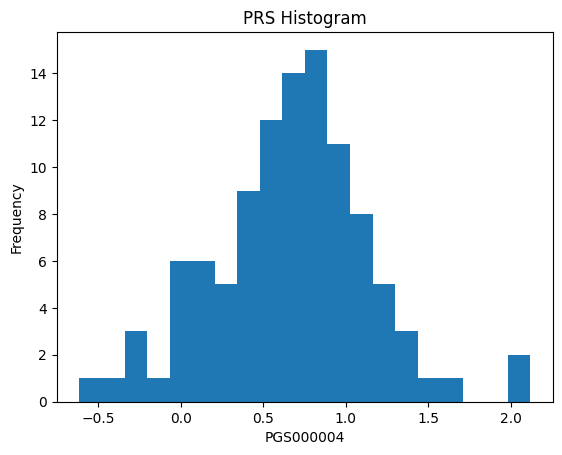

In [4]:
%%time

# 使用するゲノムデータが含まれているディレクトリパスを指定します(例: PGS000004/middle)
dir_path = "PGS000004/middle"
# 使用するPRSモデルを指定します(例: PGS000004.txt)
prs_model_name ="PGS000004.txt"
# 表示するグラフのラベルを指定します(例: PGS000004)
graph_label = 'PGS000004'
# 保存するPRSのファイル名を指定します(例: PGS000004_middle_prs.txt)
prs_file_name = 'PGS000004_middle_prs.txt'

file_names = [
    f for f in os.listdir(dir_path) if os.path.isfile(os.path.join(dir_path, f))
]

prs_lists = []

for file_name in file_names:
    prs_lists.append(compute_prs(dir_path, file_name, prs_model_name))
    print(f"{file_name} complete, number of completed is {len(prs_lists)}" )
    
# 計算したPRSをテキストファイルに保存します
s = ''
for p in prs_lists:
    s += f"{p}\n"
with open(prs_file_name, 'w') as f:
    f.write(s)

# PRSを棒グラフで表示します
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.hist(prs_lists, bins=20)
ax.set_title('PRS Histogram')
ax.set_xlabel(graph_label)
ax.set_ylabel('Frequency')
fig.show()

In [ ]:
# 保存したPRSからグラフを表示

/Users/naoki/.local/share/virtualenvs/my-zemi-UzeCub2s/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  from ipykernel import kernelapp as app


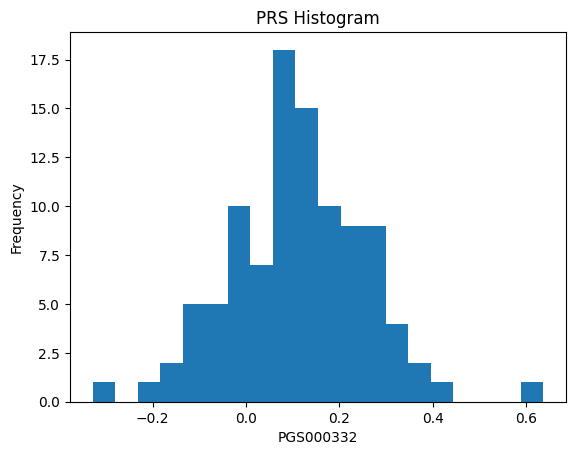

In [7]:
# グラフに表示するPRSのファイル名を指定します(例: PGS000332_middle_prs.txt)
prs_file_name = 'PGS000332_middle_prs.txt'
# 表示するグラフのラベルを指定します(例: PGS000332)
graph_label = 'PGS000332'

with open(prs_file_name, encoding="UTF-8") as f:
    text = f.read()
ar1 = text.split('\n')
ar1.pop(-1)
ar2 = []
for a in ar1:
    ar2.append(float(a))

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.hist(ar2, bins=20)
ax.set_title('PRS Histogram')
ax.set_xlabel(graph_label)
ax.set_ylabel('Frequency')
fig.show()